=== SỰ KHÁC BIỆT GIỮA HỒI QUY VÀ PHÂN LOẠI ===


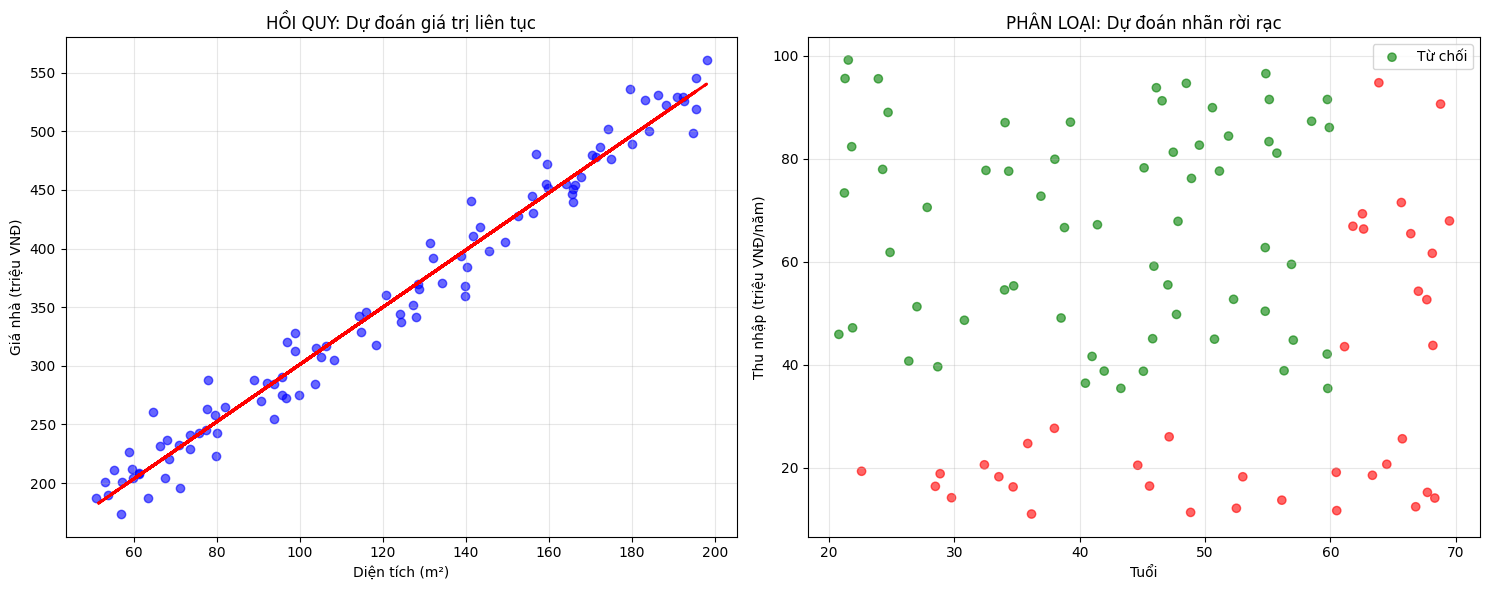

Đặc điểm của bài toán hồi quy:
- Biến mục tiêu liên tục (giá nhà: 150, 200, 250 triệu...)
- Sử dụng MSE, MAE để đánh giá
- Kết quả có thể là bất kỳ số thực nào

Đặc điểm của bài toán phân loại:
- Biến mục tiêu rời rạc (chấp nhận: 0 hoặc 1)
- Sử dụng accuracy, precision, recall để đánh giá
- Kết quả thuộc một trong các lớp đã định trước


'\nGIẢI THÍCH TỔNG QUAN:\n\n1. MỤC ĐÍCH CỦA CODE:\n   - Minh họa trực quan sự khác biệt giữa hồi quy và phân loại\n   - Cung cấp ví dụ cụ thể dễ hiểu từ thực tế\n\n2. CẤU TRÚC CODE:\n   - Import thư viện: Chuẩn bị công cụ cần thiết\n   - Tạo dữ liệu mẫu: Mô phỏng dữ liệu thực tế\n   - Visualization: Vẽ biểu đồ so sánh\n   - Giải thích: In ra đặc điểm của từng loại bài toán\n\n3. ĐIỂM QUAN TRỌNG:\n   - Hồi quy: Y là số thực, có thể là bất kỳ giá trị nào\n   - Phân loại: Y là nhãn, chỉ có thể là một trong các lớp định trước\n   - Metrics đánh giá khác nhau cho từng loại bài toán\n\n4. ỨNG DỤNG THỰC TẾ:\n   - Hồi quy: Dự đoán giá cổ phiếu, nhiệt độ, doanh số...\n   - Phân loại: Phát hiện spam, chẩn đoán bệnh, nhận dạng ảnh...\n'

In [1]:
# Import các thư viện cần thiết cho machine learning và visualization
import numpy as np  # Thư viện tính toán số học, xử lý mảng
import matplotlib.pyplot as plt  # Vẽ biểu đồ
from sklearn.datasets import make_classification, make_blobs  # Tạo dữ liệu mẫu
from sklearn.model_selection import train_test_split  # Chia dữ liệu train/test
from sklearn.preprocessing import StandardScaler  # Chuẩn hóa dữ liệu
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Đánh giá model
import pandas as pd  # Xử lý dữ liệu dạng bảng
import seaborn as sns  # Vẽ biểu đồ đẹp hơn
from scipy.special import expit  # Hàm sigmoid (sẽ dùng cho logistic regression)
import warnings
warnings.filterwarnings('ignore')  # Tắt các cảnh báo không cần thiết

def minh_hoa_phan_biet_hoi_quy_phan_loai():
    """
    Hàm minh họa sự khác biệt cơ bản giữa bài toán hồi quy và phân loại
    - Hồi quy: dự đoán giá trị liên tục (như giá nhà)
    - Phân loại: dự đoán nhãn rời rạc (như chấp nhận/từ chối)
    """
    print("=== SỰ KHÁC BIỆT GIỮA HỒI QUY VÀ PHÂN LOẠI ===")
    
    # Tạo figure với 2 subplot cạnh nhau để so sánh
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # ===== PHẦN 1: VÍ DỤ VỀ HỒI QUY =====
    # Mô phỏng bài toán dự đoán giá nhà dựa trên diện tích
    
    np.random.seed(42)  # Đặt seed để kết quả có thể tái lập
    
    # Tạo dữ liệu đầu vào: diện tích nhà từ 50-200 m²
    dien_tich = np.random.uniform(50, 200, 100)  # 100 mẫu dữ liệu ngẫu nhiên
    
    # Tạo dữ liệu đầu ra: giá nhà theo công thức tuyến tính + nhiễu
    # Công thức: giá = 2.5 * diện_tích + 50 + nhiễu_ngẫu_nhiên
    # Nghĩa là: giá cơ bản 50 triệu + 2.5 triệu/m² + sai số ngẫu nhiên
    gia_nha = 2.5 * dien_tich + 50 + np.random.normal(0, 20, 100)
    
    # Vẽ scatter plot cho dữ liệu hồi quy
    axes[0].scatter(dien_tich, gia_nha, alpha=0.6, color='blue')
    
    # Tính và vẽ đường hồi quy tuyến tính tốt nhất
    z = np.polyfit(dien_tich, gia_nha, 1)  # Tính coefficients của đường thẳng bậc 1
    p = np.poly1d(z)  # Tạo hàm polynomial từ coefficients
    axes[0].plot(dien_tich, p(dien_tich), "r--", linewidth=2)  # Vẽ đường hồi quy màu đỏ
    
    # Thiết lập labels và title cho subplot hồi quy
    axes[0].set_xlabel('Diện tích (m²)')
    axes[0].set_ylabel('Giá nhà (triệu VNĐ)')
    axes[0].set_title('HỒI QUY: Dự đoán giá trị liên tục')
    axes[0].grid(True, alpha=0.3)  # Thêm lưới với độ trong suốt 30%
    
    # ===== PHẦN 2: VÍ DỤ VỀ PHÂN LOẠI =====
    # Mô phỏng bài toán chấp nhận/từ chối khoản vay
    
    # Tạo dữ liệu đầu vào: tuổi và thu nhập
    tuoi = np.random.uniform(20, 70, 100)  # Tuổi từ 20-70
    thu_nhap = np.random.uniform(10, 100, 100) * 1000000  # Thu nhập từ 10-100 triệu VNĐ
    
    # Tạo nhãn phân loại dựa trên logic kinh doanh đơn giản
    # Chấp nhận khoản vay NÓI tuổi < 60 VÀ thu nhập > 30 triệu
    # Sử dụng phép toán boolean và chuyển thành số nguyên (0 hoặc 1)
    chap_nhan = ((tuoi < 60) & (thu_nhap > 30000000)).astype(int)
    
    # Tạo màu sắc cho từng điểm dữ liệu
    # Đỏ = từ chối (0), Xanh = chấp nhận (1)
    colors = ['red' if label == 0 else 'green' for label in chap_nhan]
    
    # Vẽ scatter plot cho dữ liệu phân loại
    # Chia thu_nhap cho 1,000,000 để hiển thị theo đơn vị triệu
    axes[1].scatter(tuoi, thu_nhap/1000000, c=colors, alpha=0.6)
    
    # Thiết lập labels và title cho subplot phân loại
    axes[1].set_xlabel('Tuổi')
    axes[1].set_ylabel('Thu nhập (triệu VNĐ/năm)')
    axes[1].set_title('PHÂN LOẠI: Dự đoán nhãn rời rạc')
    axes[1].legend(['Từ chối', 'Chấp nhận'])  # Chú thích màu sắc
    axes[1].grid(True, alpha=0.3)
    
    # Hiển thị cả 2 biểu đồ cùng lúc
    plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các subplot
    plt.show()
    
    # ===== PHẦN 3: TÓXM TẮT ĐẶC ĐIỂM =====
    # In ra console để giải thích sự khác biệt
    
    print("Đặc điểm của bài toán hồi quy:")
    print("- Biến mục tiêu liên tục (giá nhà: 150, 200, 250 triệu...)")
    print("- Sử dụng MSE, MAE để đánh giá")  # Mean Squared Error, Mean Absolute Error
    print("- Kết quả có thể là bất kỳ số thực nào")
    
    print("\nĐặc điểm của bài toán phân loại:")
    print("- Biến mục tiêu rời rạc (chấp nhận: 0 hoặc 1)")
    print("- Sử dụng accuracy, precision, recall để đánh giá")
    print("- Kết quả thuộc một trong các lớp đã định trước")

# Gọi hàm để chạy demo
minh_hoa_phan_biet_hoi_quy_phan_loai()

"""
GIẢI THÍCH TỔNG QUAN:

1. MỤC ĐÍCH CỦA CODE:
   - Minh họa trực quan sự khác biệt giữa hồi quy và phân loại
   - Cung cấp ví dụ cụ thể dễ hiểu từ thực tế

2. CẤU TRÚC CODE:
   - Import thư viện: Chuẩn bị công cụ cần thiết
   - Tạo dữ liệu mẫu: Mô phỏng dữ liệu thực tế
   - Visualization: Vẽ biểu đồ so sánh
   - Giải thích: In ra đặc điểm của từng loại bài toán

3. ĐIỂM QUAN TRỌNG:
   - Hồi quy: Y là số thực, có thể là bất kỳ giá trị nào
   - Phân loại: Y là nhãn, chỉ có thể là một trong các lớp định trước
   - Metrics đánh giá khác nhau cho từng loại bài toán
   
4. ỨNG DỤNG THỰC TẾ:
   - Hồi quy: Dự đoán giá cổ phiếu, nhiệt độ, doanh số...
   - Phân loại: Phát hiện spam, chẩn đoán bệnh, nhận dạng ảnh...
"""

=== VẤN ĐỀ KHI DÙNG HỒI QUY TUYẾN TÍNH CHO PHÂN LOẠI ===


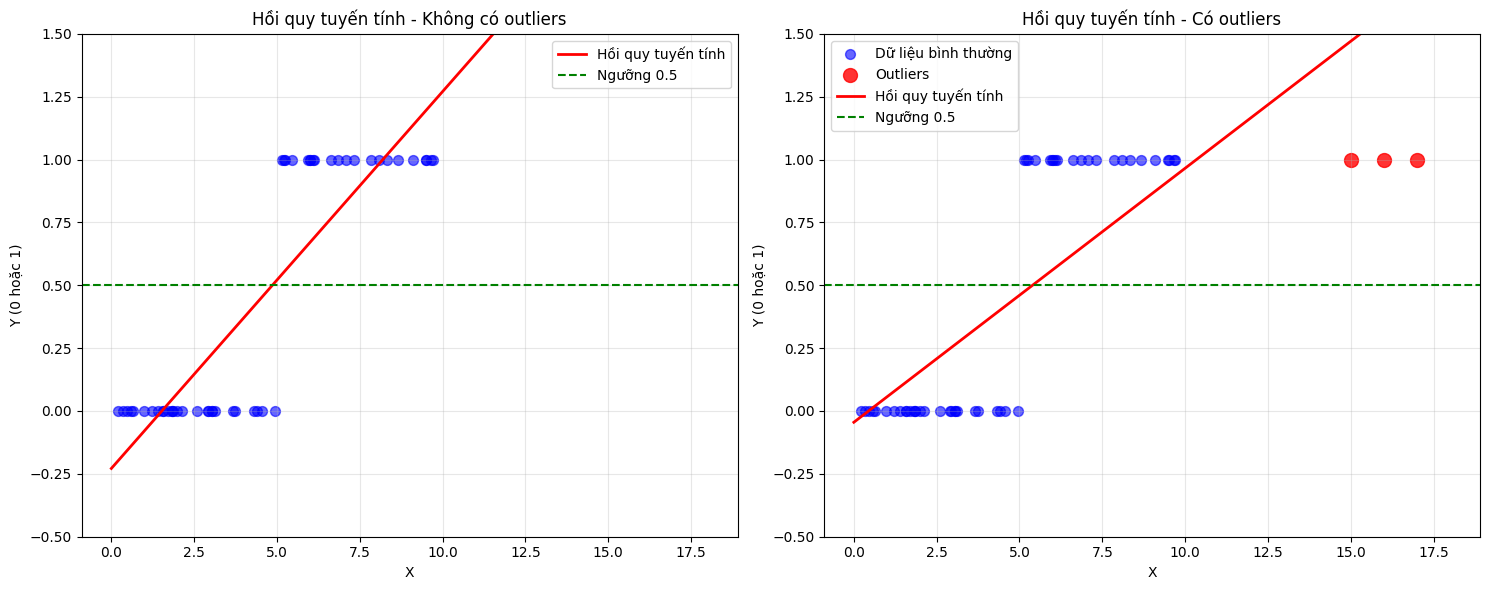

Vấn đề của hồi quy tuyến tính cho phân loại:
1. Dự đoán có thể < 0 hoặc > 1 (không phải xác suất)
   → Hồi quy tuyến tính có thể cho ra giá trị âm hoặc > 1
   → Không thể diễn giải như xác suất thuộc lớp

2. Nhạy cảm với outliers
   → Outliers kéo đường hồi quy theo hướng của chúng
   → Làm sai lệch điểm phân loại, ảnh hưởng độ chính xác

3. Giả định mối quan hệ tuyến tính
   → Dữ liệu phân loại thường không có mối quan hệ tuyến tính
   → Ranh giới quyết định cứng nhắc

4. Không thể diễn giải kết quả dưới dạng xác suất
   → Kết quả không nằm trong khoảng [0,1]
   → Không biết độ tin cậy của dự đoán


In [2]:
def van_de_hoi_quy_cho_phan_loai():
    """
    Minh họa vấn đề khi dùng hồi quy tuyến tính cho phân loại
    Hàm này sẽ tạo ra 2 biểu đồ để so sánh hiệu quả của hồi quy tuyến tính
    trong trường hợp có và không có outliers
    """
    print("=== VẤN ĐỀ KHI DÙNG HỒI QUY TUYẾN TÍNH CHO PHÂN LOẠI ===")
    
    # ========== TẠO DỮ LIỆU PHÂN LOẠI ĐƠN GIẢN ==========
    
    # Đặt seed để kết quả có thể tái tạo được
    np.random.seed(42)
    
    # Tạo 50 điểm dữ liệu X từ 0 đến 10 (phân phối đều)
    X = np.random.uniform(0, 10, 50)
    
    # Tạo nhãn y: nếu X > 5 thì y = 1, ngược lại y = 0
    # .astype(int) chuyển đổi True/False thành 1/0
    y = (X > 5).astype(int)  # Lớp 1 nếu X > 5, ngược lại lớp 0
    
    # ========== THÊM OUTLIERS ĐỂ KIỂM TRA TÍNH BỀN VỮNG ==========
    
    # Tạo 3 điểm outliers có giá trị X rất cao (15, 16, 17)
    X_outliers = np.array([15, 16, 17])
    # Outliers này vẫn thuộc lớp 1 (vì > 5)
    y_outliers = np.array([1, 1, 1])
    
    # Gộp dữ liệu gốc với outliers
    X_full = np.concatenate([X, X_outliers])
    y_full = np.concatenate([y, y_outliers])
    
    # ========== XÂY DỰNG MÔ HÌNH HỒI QUY TUYẾN TÍNH ==========
    
    # Import thư viện hồi quy tuyến tính từ sklearn
    from sklearn.linear_model import LinearRegression
    
    # Tạo mô hình 1: Chỉ dùng dữ liệu bình thường (không có outliers)
    lr_normal = LinearRegression()
    # Fit mô hình - cần reshape X thành ma trận 2D (n_samples, 1)
    lr_normal.fit(X.reshape(-1, 1), y)
    
    # Tạo mô hình 2: Dùng dữ liệu có outliers
    lr_outliers = LinearRegression()
    # Fit mô hình với dữ liệu có outliers
    lr_outliers.fit(X_full.reshape(-1, 1), y_full)
    
    # ========== VẼ BIỂU ĐỒ SO SÁNH ==========
    
    # Tạo figure với 2 subplot cạnh nhau
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Tạo dải giá trị X từ 0 đến 18 để vẽ đường hồi quy
    # 200 điểm để đường vẽ mượt mà
    x_range = np.linspace(0, 18, 200).reshape(-1, 1)
    
    # ========== VẼ BIỂU ĐỒ 1: KHÔNG CÓ OUTLIERS ==========
    
    # Dự đoán y cho toàn bộ dải x_range bằng mô hình bình thường
    pred_normal = lr_normal.predict(x_range)
    
    # Vẽ scatter plot của dữ liệu gốc
    axes[0].scatter(X, y, color='blue', alpha=0.6, s=50)
    
    # Vẽ đường hồi quy tuyến tính màu đỏ
    axes[0].plot(x_range, pred_normal, 'r-', linewidth=2, label='Hồi quy tuyến tính')
    
    # Vẽ đường ngưỡng 0.5 (quyết định phân loại)
    axes[0].axhline(y=0.5, color='green', linestyle='--', label='Ngưỡng 0.5')
    
    # Thiết lập các thông số cho biểu đồ 1
    axes[0].set_xlabel('X')  # Nhãn trục x
    axes[0].set_ylabel('Y (0 hoặc 1)')  # Nhãn trục y
    axes[0].set_title('Hồi quy tuyến tính - Không có outliers')  # Tiêu đề
    axes[0].legend()  # Hiển thị chú thích
    axes[0].grid(True, alpha=0.3)  # Hiển thị lưới mờ
    axes[0].set_ylim(-0.5, 1.5)  # Giới hạn trục y từ -0.5 đến 1.5
    
    # ========== VẼ BIỂU ĐỒ 2: CÓ OUTLIERS ==========
    
    # Dự đoán y cho toàn bộ dải x_range bằng mô hình có outliers
    pred_outliers = lr_outliers.predict(x_range)
    
    # Vẽ dữ liệu bình thường màu xanh
    axes[1].scatter(X, y, color='blue', alpha=0.6, s=50, label='Dữ liệu bình thường')
    
    # Vẽ outliers màu đỏ, kích thước lớn hơn để nổi bật
    axes[1].scatter(X_outliers, y_outliers, color='red', alpha=0.8, s=100, label='Outliers')
    
    # Vẽ đường hồi quy tuyến tính (bị ảnh hưởng bởi outliers)
    axes[1].plot(x_range, pred_outliers, 'r-', linewidth=2, label='Hồi quy tuyến tính')
    
    # Vẽ đường ngưỡng 0.5
    axes[1].axhline(y=0.5, color='green', linestyle='--', label='Ngưỡng 0.5')
    
    # Thiết lập các thông số cho biểu đồ 2
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y (0 hoặc 1)')
    axes[1].set_title('Hồi quy tuyến tính - Có outliers')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim(-0.5, 1.5)
    
    # Điều chỉnh khoảng cách giữa các subplot để không bị chồng lấp
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()
    
    # ========== IN KẾT LUẬN VỀ CÁC VẤN ĐỀ ==========
    
    print("Vấn đề của hồi quy tuyến tính cho phân loại:")
    print("1. Dự đoán có thể < 0 hoặc > 1 (không phải xác suất)")
    print("   → Hồi quy tuyến tính có thể cho ra giá trị âm hoặc > 1")
    print("   → Không thể diễn giải như xác suất thuộc lớp")
    print()
    print("2. Nhạy cảm với outliers")
    print("   → Outliers kéo đường hồi quy theo hướng của chúng")
    print("   → Làm sai lệch điểm phân loại, ảnh hưởng độ chính xác")
    print()
    print("3. Giả định mối quan hệ tuyến tính")
    print("   → Dữ liệu phân loại thường không có mối quan hệ tuyến tính")
    print("   → Ranh giới quyết định cứng nhắc")
    print()
    print("4. Không thể diễn giải kết quả dưới dạng xác suất")
    print("   → Kết quả không nằm trong khoảng [0,1]")
    print("   → Không biết độ tin cậy của dự đoán")

# Gọi hàm để chạy demo (cần import numpy và matplotlib trước)
# import numpy as np
# import matplotlib.pyplot as plt
# van_de_hoi_quy_cho_phan_loai()

van_de_hoi_quy_cho_phan_loai()

=== HÀM SIGMOID - CHÌA KHÓA CỦA HỒI QUY LOGISTIC ===


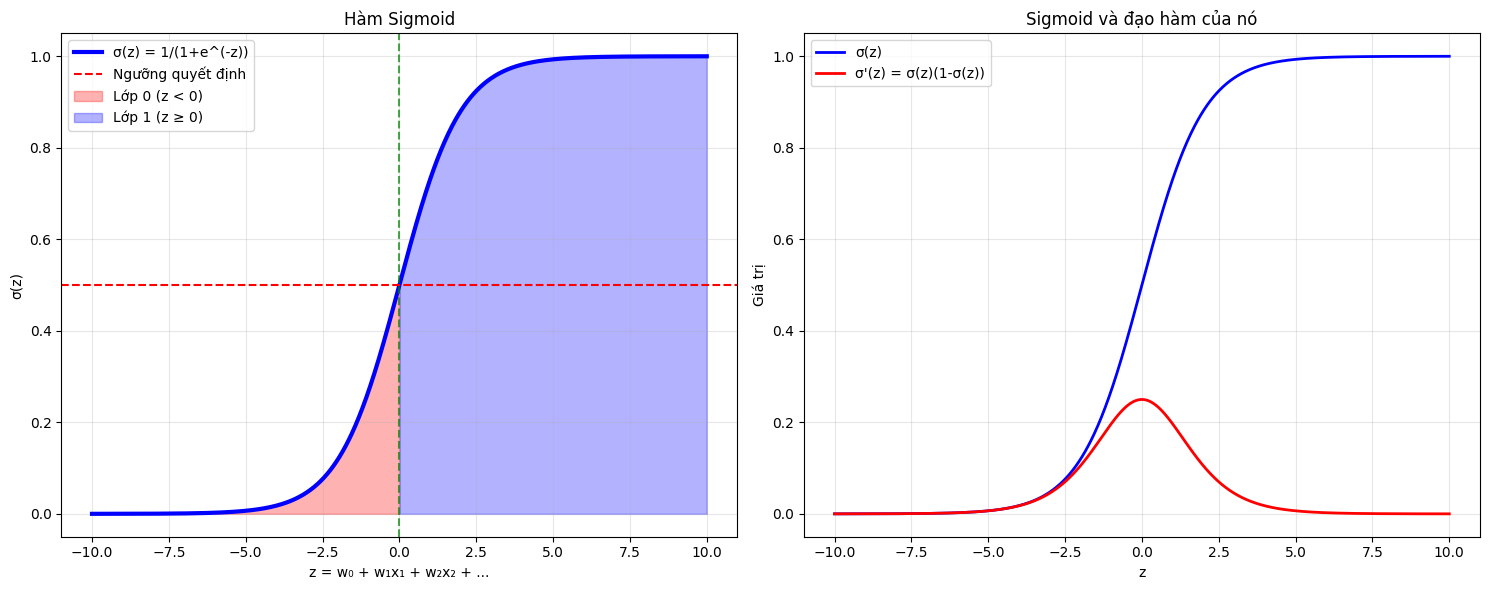

Đặc tính của hàm sigmoid:
1. Miền giá trị: (0, 1) - có thể diễn giải như xác suất
   → Không bao giờ chạm 0 hoặc 1, luôn nằm giữa
   → Có thể hiểu như P(y=1|x)

2. Đối xứng quanh điểm (0, 0.5)
   → σ(z) + σ(-z) = 1
   → Điểm uốn tại z=0, σ(0) = 0.5

3. Đơn điệu tăng - giữ được thứ tự
   → z₁ < z₂ thì σ(z₁) < σ(z₂)
   → Không làm đảo lộn thứ tự dự đoán

4. Đạo hàm đơn giản: σ'(z) = σ(z)(1-σ(z))
   → Dễ tính toán trong quá trình training
   → Đạo hàm max tại z=0 (σ'(0) = 0.25)

5. Tiệm cận: σ(-∞) = 0, σ(+∞) = 1
   → Với z rất âm → xác suất gần 0
   → Với z rất dương → xác suất gần 1


Ví dụ tính toán:
z	|	σ(z)	|	Dự đoán
----------------------------------------
-5	|	0.0067	|	Lớp 0
-2	|	0.1192	|	Lớp 0
 0	|	0.5000	|	Lớp 1
 2	|	0.8808	|	Lớp 1
 5	|	0.9933	|	Lớp 1

Nhận xét:
- z = 0 là điểm quyết định (σ(0) = 0.5)
- z > 0: xác suất > 0.5 → dự đoán lớp 1
- z < 0: xác suất < 0.5 → dự đoán lớp 0
- Càng xa 0, xác suất càng gần 0 hoặc 1 (confidence cao)


In [3]:
def giai_thich_ham_sigmoid():
    """
    Giải thích chi tiết về hàm sigmoid
    Hàm này sẽ tạo ra 2 biểu đồ:
    1. Đồ thị hàm sigmoid với vùng phân loại
    2. So sánh sigmoid với đạo hàm của nó
    """
    print("=== HÀM SIGMOID - CHÌA KHÓA CỦA HỒI QUY LOGISTIC ===")
    
    # ========== ĐỊNH NGHĨA HÀM SIGMOID ==========
    
    def sigmoid(z):
        """
        Hàm sigmoid: σ(z) = 1 / (1 + e^(-z))
        
        Tham số:
        - z: có thể là số hoặc mảng numpy
        
        Trả về:
        - Giá trị sigmoid trong khoảng (0, 1)
        """
        return 1 / (1 + np.exp(-z))
    
    # ========== TẠO DỮ LIỆU ĐỂ VẼ ĐỒ THỊ ==========
    
    # Tạo 1000 điểm từ -10 đến 10 để có đồ thị mượt mà
    z = np.linspace(-10, 10, 1000)
    
    # Tính giá trị sigmoid cho mỗi điểm z
    sigmoid_values = sigmoid(z)
    
    # ========== THIẾT LẬP FIGURE VÀ SUBPLOTS ==========
    
    # Tạo figure với 2 subplot cạnh nhau
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # ========== VẼ BIỂU ĐỒ 1: HÀM SIGMOID VÀ VÙNG PHÂN LOẠI ==========
    
    # Vẽ đường sigmoid chính màu xanh, độ dày 3
    axes[0].plot(z, sigmoid_values, 'b-', linewidth=3, label='σ(z) = 1/(1+e^(-z))')
    
    # Vẽ đường ngưỡng quyết định tại y = 0.5 (màu đỏ, đứt nét)
    axes[0].axhline(y=0.5, color='red', linestyle='--', label='Ngưỡng quyết định')
    
    # Vẽ đường thẳng đứng tại z = 0 (màu xanh lá, đứt nét, trong suốt)
    axes[0].axvline(x=0, color='green', linestyle='--', alpha=0.7)
    
    # Tô màu vùng lớp 0 (z < 0) bằng màu đỏ nhạt
    axes[0].fill_between(z, 0, sigmoid_values, where=(z < 0), 
                        alpha=0.3, color='red', label='Lớp 0 (z < 0)')
    
    # Tô màu vùng lớp 1 (z ≥ 0) bằng màu xanh nhạt
    axes[0].fill_between(z, 0, sigmoid_values, where=(z >= 0), 
                        alpha=0.3, color='blue', label='Lớp 1 (z ≥ 0)')
    
    # Thiết lập nhãn và tiêu đề cho biểu đồ 1
    axes[0].set_xlabel('z = w₀ + w₁x₁ + w₂x₂ + ...')  # z là tổ hợp tuyến tính
    axes[0].set_ylabel('σ(z)')  # Giá trị sigmoid
    axes[0].set_title('Hàm Sigmoid')
    axes[0].legend()  # Hiển thị chú thích
    axes[0].grid(True, alpha=0.3)  # Hiển thị lưới mờ
    
    # ========== VẼ BIỂU ĐỒ 2: SIGMOID VÀ ĐẠO HÀM ==========
    
    # Tính đạo hàm của sigmoid: σ'(z) = σ(z) * (1 - σ(z))
    # Đây là công thức đạo hàm đặc biệt của sigmoid, rất hữu ích trong backpropagation
    sigmoid_derivative = sigmoid_values * (1 - sigmoid_values)
    
    # Vẽ đường sigmoid gốc màu xanh
    axes[1].plot(z, sigmoid_values, 'b-', linewidth=2, label='σ(z)')
    
    # Vẽ đường đạo hàm màu đỏ
    axes[1].plot(z, sigmoid_derivative, 'r-', linewidth=2, 
                label="σ'(z) = σ(z)(1-σ(z))")
    
    # Thiết lập nhãn và tiêu đề cho biểu đồ 2
    axes[1].set_xlabel('z')
    axes[1].set_ylabel('Giá trị')
    axes[1].set_title('Sigmoid và đạo hàm của nó')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Điều chỉnh layout để tránh chồng lấp
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()
    
    # ========== GIẢI THÍCH CÁC ĐẶC TÍNH CỦA HÀM SIGMOID ==========
    
    print("Đặc tính của hàm sigmoid:")
    print("1. Miền giá trị: (0, 1) - có thể diễn giải như xác suất")
    print("   → Không bao giờ chạm 0 hoặc 1, luôn nằm giữa")
    print("   → Có thể hiểu như P(y=1|x)")
    print()
    
    print("2. Đối xứng quanh điểm (0, 0.5)")
    print("   → σ(z) + σ(-z) = 1")
    print("   → Điểm uốn tại z=0, σ(0) = 0.5")
    print()
    
    print("3. Đơn điệu tăng - giữ được thứ tự")
    print("   → z₁ < z₂ thì σ(z₁) < σ(z₂)")
    print("   → Không làm đảo lộn thứ tự dự đoán")
    print()
    
    print("4. Đạo hàm đơn giản: σ'(z) = σ(z)(1-σ(z))")
    print("   → Dễ tính toán trong quá trình training")
    print("   → Đạo hàm max tại z=0 (σ'(0) = 0.25)")
    print()
    
    print("5. Tiệm cận: σ(-∞) = 0, σ(+∞) = 1")
    print("   → Với z rất âm → xác suất gần 0")
    print("   → Với z rất dương → xác suất gần 1")
    print()
    
    # ========== VÍ DỤ TÍNH TOÁN CỤ THỂ ==========
    
    print(f"\nVí dụ tính toán:")
    print("z\t|\tσ(z)\t|\tDự đoán")
    print("-" * 40)
    
    # Danh sách các giá trị z để test
    test_values = [-5, -2, 0, 2, 5]
    
    for z_val in test_values:
        # Tính giá trị sigmoid
        sigmoid_val = sigmoid(z_val)
        
        # Quyết định phân loại dựa trên ngưỡng 0.5
        prediction = "Lớp 1" if sigmoid_val >= 0.5 else "Lớp 0"
        
        # In kết quả với format đẹp
        print(f"{z_val:2d}\t|\t{sigmoid_val:.4f}\t|\t{prediction}")
    
    print()
    print("Nhận xét:")
    print("- z = 0 là điểm quyết định (σ(0) = 0.5)")
    print("- z > 0: xác suất > 0.5 → dự đoán lớp 1")
    print("- z < 0: xác suất < 0.5 → dự đoán lớp 0")
    print("- Càng xa 0, xác suất càng gần 0 hoặc 1 (confidence cao)")
    
giai_thich_ham_sigmoid()
# Để chạy code này, cần import:
# import numpy as np
# import matplotlib.pyplot as plt
# giai_thich_ham_sigmoid()

=== DEMO HỒI QUY LOGISTIC TỪ ĐẦU ===

1. Tạo dữ liệu phân loại...
2. Chia dữ liệu train/validation...
   - Training: 140 mẫu
   - Validation: 60 mẫu
3. Chuẩn hóa dữ liệu (StandardScaler)...
4. Huấn luyện mô hình...
=== BẮT ĐẦU HUẤN LUYỆN HỒI QUY LOGISTIC ===
Dữ liệu: 140 mẫu, 2 đặc trưng
Learning rate: 0.1

Vòng lặp | Cost     | Accuracy | Thay đổi Cost
--------------------------------------------------
       0 | 0.693465 |    0.571 | +0.000000
       1 | 0.681651 |    0.814 | +0.011815
       2 | 0.670420 |    0.821 | +0.011231
       3 | 0.659742 |    0.821 | +0.010678
       4 | 0.649586 |    0.836 | +0.010156
       5 | 0.639924 |    0.836 | +0.009662
       6 | 0.630727 |    0.829 | +0.009197
       7 | 0.621970 |    0.829 | +0.008757
       8 | 0.613626 |    0.836 | +0.008343
       9 | 0.605674 |    0.836 | +0.007953
     100 | 0.400209 |    0.850 | +0.000583
     200 | 0.370982 |    0.850 | +0.000140
     300 | 0.362504 |    0.850 | +0.000050
     400 | 0.359235 |    0.850 | +

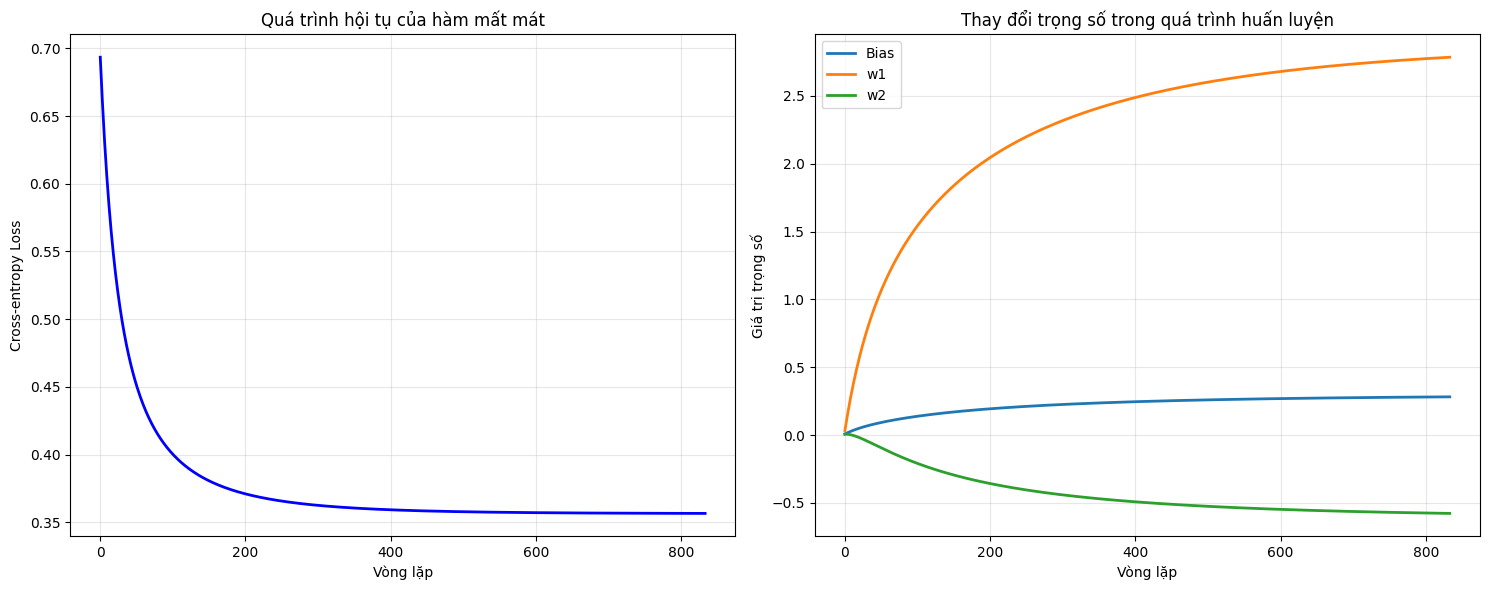


7. Vẽ ranh giới quyết định...


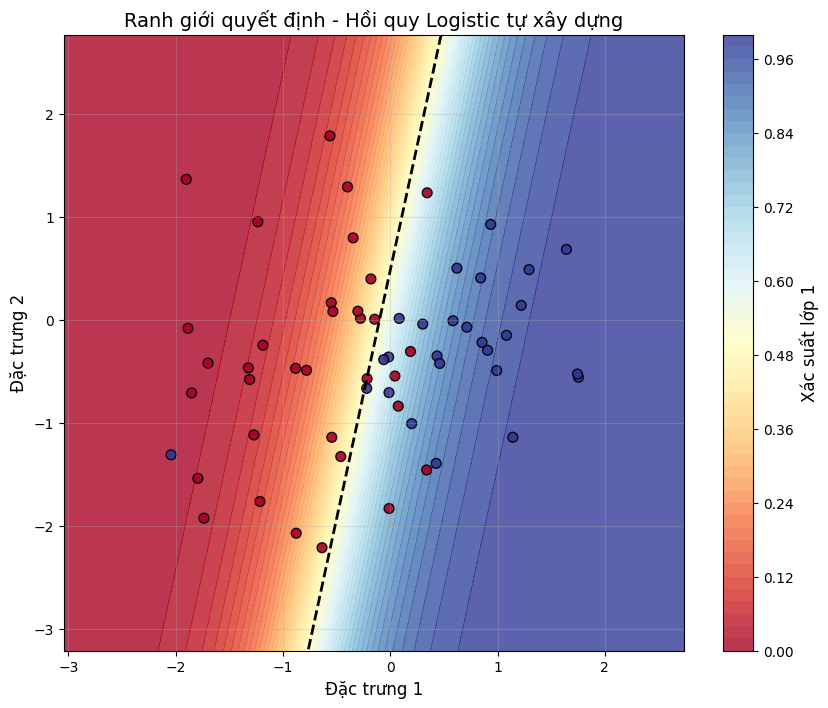


8. So sánh với sklearn...
   Accuracy của sklearn: 0.8667
   Accuracy của mô hình tự xây dựng: 0.8667


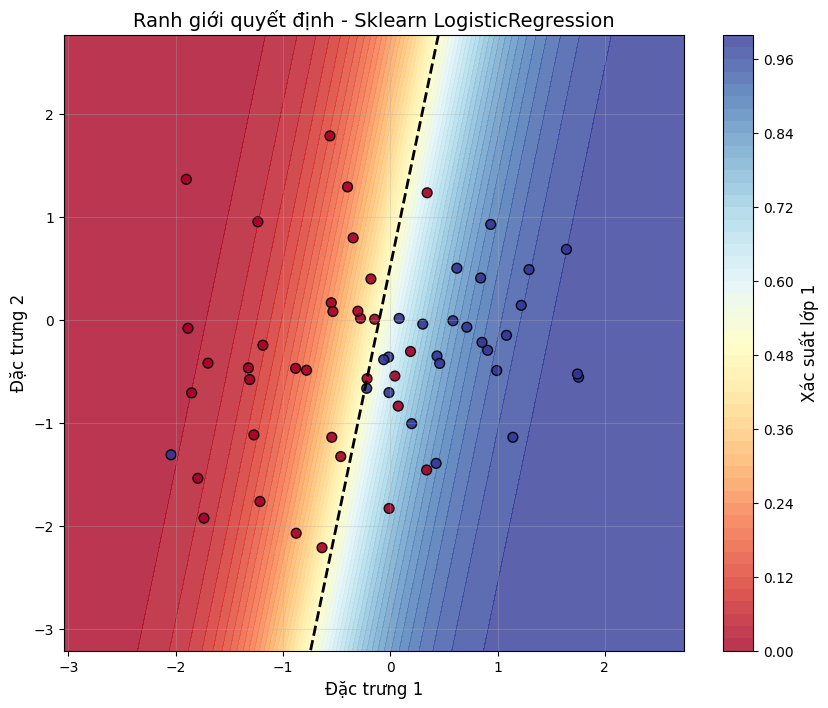

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class HoiQuyLogisticTuDau:
    """
    Hồi quy Logistic được xây dựng từ đầu
    Sử dụng gradient descent để tối ưu hàm mất mát cross-entropy
    """
    
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        """
        Khởi tạo các tham số cho mô hình
        
        Tham số:
        - learning_rate: Tốc độ học (bước nhảy trong gradient descent)
        - max_iterations: Số vòng lặp tối đa
        - tolerance: Ngưỡng dừng khi hàm mất mát thay đổi ít
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        
        # Lưu trữ lịch sử huấn luyện để phân tích sau
        self.cost_history = []  # Lịch sử hàm mất mát
        self.weights_history = []  # Lịch sử thay đổi trọng số
        
        # Tham số mô hình (sẽ được học trong quá trình training)
        self.weights = None  # Vector trọng số [bias, w1, w2, ...]
        self.n_features = None  # Số lượng đặc trưng
    
    def _sigmoid(self, z):
        """
        Hàm sigmoid với xử lý overflow để tránh lỗi tính toán
        σ(z) = 1 / (1 + e^(-z))
        
        Tham số:
        - z: giá trị đầu vào (có thể là số hoặc mảng)
        
        Trả về:
        - Giá trị sigmoid trong khoảng (0, 1)
        """
        # Clipping z để tránh overflow khi tính exp(-z)
        # Nếu z quá lớn → exp(-z) ≈ 0 → sigmoid ≈ 1
        # Nếu z quá nhỏ → exp(-z) ≈ ∞ → có thể overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _them_bias(self, X):
        """
        Thêm cột bias (intercept) vào ma trận đặc trưng
        Bias tương ứng với x0 = 1 trong phương trình z = w0 + w1*x1 + w2*x2 + ...
        
        Tham số:
        - X: ma trận đặc trưng (n_samples, n_features)
        
        Trả về:
        - Ma trận mới với cột bias đầu tiên (n_samples, n_features + 1)
        """
        return np.column_stack([np.ones(X.shape[0]), X])
    
    def _tinh_xac_suat(self, X):
        """
        Tính xác suất dự đoán P(y=1|x) cho mỗi mẫu
        
        Tham số:
        - X: ma trận đặc trưng
        
        Trả về:
        - Mảng xác suất cho mỗi mẫu
        """
        # Thêm cột bias
        X_with_bias = self._them_bias(X)
        
        # Tính tổ hợp tuyến tính z = X * weights
        z = X_with_bias @ self.weights
        
        # Áp dụng hàm sigmoid
        return self._sigmoid(z)
    
    def _tinh_ham_mat_mat(self, y_true, probabilities):
        """
        Tính hàm mất mát Cross-Entropy (Log Loss)
        CE = -1/m * Σ[y*log(p) + (1-y)*log(1-p)]
        
        Tham số:
        - y_true: nhãn thật (0 hoặc 1)
        - probabilities: xác suất dự đoán từ sigmoid
        
        Trả về:
        - Giá trị hàm mất mát (số dương, càng nhỏ càng tốt)
        """
        # Tránh log(0) bằng cách clipping xác suất
        # log(0) = -∞ sẽ gây lỗi tính toán
        probabilities = np.clip(probabilities, 1e-15, 1 - 1e-15)
        
        # Cross-entropy loss cho binary classification
        # Nếu y=1: cost = -log(p) → muốn p gần 1
        # Nếu y=0: cost = -log(1-p) → muốn p gần 0
        cost = -np.mean(y_true * np.log(probabilities) + 
                       (1 - y_true) * np.log(1 - probabilities))
        return cost
    
    def _tinh_gradient(self, X, y_true, probabilities):
        """
        Tính gradient của hàm mất mát để update trọng số
        ∇w = 1/m * X^T * (predictions - y_true)
        
        Tham số:
        - X: ma trận đặc trưng
        - y_true: nhãn thật
        - probabilities: xác suất dự đoán
        
        Trả về:
        - Vector gradient có cùng kích thước với weights
        """
        X_with_bias = self._them_bias(X)
        m = X.shape[0]  # Số lượng mẫu
        
        # Gradient cho logistic regression
        # Sai số: (dự đoán - thực tế)
        # Gradient = trung bình của (đặc trưng * sai số)
        gradient = (1/m) * X_with_bias.T @ (probabilities - y_true)
        return gradient
    
    def huan_luyen(self, X, y, verbose=True):
        """
        Huấn luyện mô hình sử dụng gradient descent
        
        Tham số:
        - X: ma trận đặc trưng training
        - y: nhãn training
        - verbose: có in thông tin quá trình không
        """
        # Chuyển về numpy array để đảm bảo tính toán đúng
        X = np.array(X)
        y = np.array(y)
        
        self.n_features = X.shape[1]
        
        # Khởi tạo trọng số ngẫu nhiên (gần 0)
        # +1 vì có thêm bias term
        self.weights = np.random.normal(0, 0.01, self.n_features + 1)
        
        if verbose:
            print(f"=== BẮT ĐẦU HUẤN LUYỆN HỒI QUY LOGISTIC ===")
            print(f"Dữ liệu: {X.shape[0]} mẫu, {X.shape[1]} đặc trưng")
            print(f"Learning rate: {self.learning_rate}")
            print()
            print("Vòng lặp | Cost     | Accuracy | Thay đổi Cost")
            print("-" * 50)
        
        # Vòng lặp gradient descent
        for iteration in range(self.max_iterations):
            # Bước 1: Forward pass - tính xác suất dự đoán
            probabilities = self._tinh_xac_suat(X)
            
            # Bước 2: Tính hàm mất mát
            cost = self._tinh_ham_mat_mat(y, probabilities)
            
            # Bước 3: Tính accuracy để theo dõi
            predictions = (probabilities >= 0.5).astype(int)
            accuracy = np.mean(predictions == y)
            
            # Bước 4: Backward pass - tính gradient
            gradient = self._tinh_gradient(X, y, probabilities)
            
            # Bước 5: Update trọng số theo hướng âm của gradient
            # weights = weights - learning_rate * gradient
            self.weights -= self.learning_rate * gradient
            
            # Lưu lịch sử để phân tích sau
            self.cost_history.append(cost)
            self.weights_history.append(self.weights.copy())
            
            # In tiến trình mỗi 100 vòng lặp hoặc 10 vòng đầu
            if verbose and (iteration % 100 == 0 or iteration < 10):
                cost_change = 0 if iteration == 0 else self.cost_history[-2] - cost
                print(f"{iteration:8d} | {cost:8.6f} | {accuracy:8.3f} | {cost_change:+.6f}")
            
            # Kiểm tra hội tụ: nếu cost thay đổi quá ít thì dừng
            if iteration > 0 and abs(self.cost_history[-1] - self.cost_history[-2]) < self.tolerance:
                if verbose:
                    print(f"Hội tụ tại vòng lặp {iteration}")
                break
        
        if verbose:
            print(f"\n=== HOÀN THÀNH HUẤN LUYỆN ===")
            print(f"Bias: {self.weights[0]:.6f}")
            for i in range(1, len(self.weights)):
                print(f"Trọng số {i}: {self.weights[i]:.6f}")
            print(f"Cross-entropy cuối cùng: {self.cost_history[-1]:.6f}")
            print(f"Accuracy cuối cùng: {accuracy:.3f}")
    
    def du_doan_xac_suat(self, X):
        """
        Dự đoán xác suất P(y=1|x) cho dữ liệu mới
        
        Tham số:
        - X: ma trận đặc trưng cần dự đoán
        
        Trả về:
        - Mảng xác suất cho mỗi mẫu
        """
        if self.weights is None:
            raise ValueError("Mô hình chưa được huấn luyện!")
        return self._tinh_xac_suat(X)
    
    def du_doan(self, X):
        """
        Dự đoán nhãn lớp (0 hoặc 1) cho dữ liệu mới
        Ngưỡng quyết định: 0.5
        
        Tham số:
        - X: ma trận đặc trưng cần dự đoán
        
        Trả về:
        - Mảng nhãn dự đoán (0 hoặc 1)
        """
        probabilities = self.du_doan_xac_suat(X)
        return (probabilities >= 0.5).astype(int)
    
    def danh_gia(self, X, y):
        """
        Đánh giá hiệu suất mô hình trên tập test
        
        Tham số:
        - X: ma trận đặc trưng test
        - y: nhãn thật test
        
        Trả về:
        - Dictionary chứa các metric đánh giá
        """
        probabilities = self.du_doan_xac_suat(X)
        predictions = self.du_doan(X)
        cost = self._tinh_ham_mat_mat(y, probabilities)
        accuracy = np.mean(predictions == y)
        
        return {
            'Cross-entropy': cost,
            'Accuracy': accuracy,
            'Precision': self._tinh_precision(y, predictions),
            'Recall': self._tinh_recall(y, predictions),
            'F1-score': self._tinh_f1(y, predictions)
        }
    
    def _tinh_precision(self, y_true, y_pred):
        """
        Tính precision = TP / (TP + FP)
        Trong số những mẫu dự đoán là positive, có bao nhiêu % đúng?
        """
        tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positive
        fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positive
        return tp / (tp + fp) if (tp + fp) > 0 else 0
    
    def _tinh_recall(self, y_true, y_pred):
        """
        Tính recall = TP / (TP + FN)
        Trong số những mẫu thực sự positive, có bao nhiêu % được phát hiện?
        """
        tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positive
        fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negative
        return tp / (tp + fn) if (tp + fn) > 0 else 0
    
    def _tinh_f1(self, y_true, y_pred):
        """
        Tính F1-score = 2 * (precision * recall) / (precision + recall)
        Trung bình điều hòa của precision và recall
        """
        precision = self._tinh_precision(y_true, y_pred)
        recall = self._tinh_recall(y_true, y_pred)
        return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    def ve_qua_trinh_huan_luyen(self):
        """
        Vẽ biểu đồ quá trình huấn luyện
        - Biểu đồ 1: Sự hội tụ của hàm mất mát
        - Biểu đồ 2: Thay đổi trọng số theo thời gian
        """
        if not self.cost_history:
            print("Chưa có dữ liệu huấn luyện!")
            return
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Biểu đồ 1: Hàm mất mát theo vòng lặp
        axes[0].plot(self.cost_history, 'b-', linewidth=2)
        axes[0].set_xlabel('Vòng lặp')
        axes[0].set_ylabel('Cross-entropy Loss')
        axes[0].set_title('Quá trình hội tụ của hàm mất mát')
        axes[0].grid(True, alpha=0.3)
        
        # Biểu đồ 2: Thay đổi trọng số (chỉ hiển thị 4 trọng số đầu)
        weights_array = np.array(self.weights_history)
        for i in range(min(4, weights_array.shape[1])):
            label = 'Bias' if i == 0 else f'w{i}'
            axes[1].plot(weights_array[:, i], label=label, linewidth=2)
        
        axes[1].set_xlabel('Vòng lặp')
        axes[1].set_ylabel('Giá trị trọng số')
        axes[1].set_title('Thay đổi trọng số trong quá trình huấn luyện')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()


def ve_ranh_gioi_quyet_dinh(model, X, y, title="Ranh giới quyết định"):
    """
    Vẽ ranh giới quyết định cho mô hình phân loại 2D
    Hiển thị cách mô hình phân chia không gian đặc trưng
    
    Tham số:
    - model: mô hình đã được huấn luyện
    - X: dữ liệu đặc trưng (chỉ 2 chiều để vẽ được)
    - y: nhãn thật
    - title: tiêu đề biểu đồ
    """
    h = 0.02  # Bước trong mesh (càng nhỏ càng mịn)
    
    # Tạo mesh grid để tính xác suất cho toàn bộ không gian
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Dự đoán xác suất cho mọi điểm trong mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Kiểm tra loại mô hình để gọi hàm dự đoán phù hợp
    if hasattr(model, 'du_doan_xac_suat'):
        # Mô hình tự xây dựng
        Z = model.du_doan_xac_suat(mesh_points)
    else:
        # Mô hình sklearn
        Z = model.predict_proba(mesh_points)[:, 1]
    
    # Reshape lại để vẽ contour
    Z = Z.reshape(xx.shape)
    
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 8))
    
    # Vẽ contour với màu sắc thể hiện xác suất
    # Đỏ = xác suất thấp (gần lớp 0), Xanh = xác suất cao (gần lớp 1)
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    colorbar = plt.colorbar()
    colorbar.set_label('Xác suất lớp 1', fontsize=12)
    
    # Vẽ đường ranh giới quyết định chính (xác suất = 0.5)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')
    
    # Vẽ dữ liệu thật với màu tương ứng nhãn
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                         edgecolors='black', s=50, alpha=0.9)
    
    plt.xlabel('Đặc trưng 1', fontsize=12)
    plt.ylabel('Đặc trưng 2', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()


def demo_hoi_quy_logistic():
    """
    Hàm demo chạy toàn bộ quá trình huấn luyện và đánh giá
    """
    print("=== DEMO HỒI QUY LOGISTIC TỪ ĐẦU ===\n")
    
    # ========== TẠO DỮ LIỆU ==========
    print("1. Tạo dữ liệu phân loại...")
    np.random.seed(42)
    X_test, y_test = make_classification(
        n_samples=200,      # 200 mẫu
        n_features=2,       # 2 đặc trưng (để vẽ được 2D)
        n_redundant=0,      # Không có đặc trưng thừa
        n_informative=2,    # 2 đặc trưng đều có thông tin
        n_clusters_per_class=1,  # 1 cụm cho mỗi lớp
        random_state=42
    )
    
    # ========== CHIA DỮ LIỆU ==========
    print("2. Chia dữ liệu train/validation...")
    X_train, X_val, y_train, y_val = train_test_split(
        X_test, y_test, test_size=0.3, random_state=42
    )
    
    print(f"   - Training: {X_train.shape[0]} mẫu")
    print(f"   - Validation: {X_val.shape[0]} mẫu")
    
    # ========== CHUẨN HÓA DỮ LIỆU ==========
    print("3. Chuẩn hóa dữ liệu (StandardScaler)...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # ========== HUẤN LUYỆN MÔ HÌNH ==========
    print("4. Huấn luyện mô hình...")
    logistic_model = HoiQuyLogisticTuDau(
        learning_rate=0.1,    # Tốc độ học
        max_iterations=1000   # Tối đa 1000 vòng lặp
    )
    logistic_model.huan_luyen(X_train_scaled, y_train)
    
    # ========== ĐÁNH GIÁ MÔ HÌNH ==========
    print("\n5. Đánh giá mô hình...")
    results = logistic_model.danh_gia(X_val_scaled, y_val)
    print(f"Kết quả trên tập validation:")
    for metric, value in results.items():
        print(f"   {metric}: {value:.4f}")
    
    # ========== VẼ BIỂU ĐỒ ==========
    print("\n6. Vẽ biểu đồ quá trình huấn luyện...")
    logistic_model.ve_qua_trinh_huan_luyen()
    
    print("\n7. Vẽ ranh giới quyết định...")
    ve_ranh_gioi_quyet_dinh(
        logistic_model, 
        X_val_scaled, 
        y_val, 
        "Ranh giới quyết định - Hồi quy Logistic tự xây dựng"
    )
    
    # ========== SO SÁNH VỚI SKLEARN ==========
    print("\n8. So sánh với sklearn...")
    from sklearn.linear_model import LogisticRegression
    
    sklearn_model = LogisticRegression(random_state=42)
    sklearn_model.fit(X_train_scaled, y_train)
    
    sklearn_accuracy = sklearn_model.score(X_val_scaled, y_val)
    print(f"   Accuracy của sklearn: {sklearn_accuracy:.4f}")
    print(f"   Accuracy của mô hình tự xây dựng: {results['Accuracy']:.4f}")
    
    # Vẽ ranh giới quyết định của sklearn
    ve_ranh_gioi_quyet_dinh(
        sklearn_model, 
        X_val_scaled, 
        y_val, 
        "Ranh giới quyết định - Sklearn LogisticRegression"
    )
    
    return logistic_model, sklearn_model

# ========== CHẠY DEMO ==========
if __name__ == "__main__":
    # Chạy demo hoàn chỉnh
    my_model, sklearn_model = demo_hoi_quy_logistic()

=== DEMO CÂY QUYẾT ĐỊNH TỪ ĐẦU ===

1. Tạo dữ liệu demo...
   - Dữ liệu: 200 mẫu, 2 đặc trưng
   - Phân phối lớp: [148  52]
2. Chia dữ liệu train/test...
   - Training: 140 mẫu
   - Test: 60 mẫu
3. Huấn luyện cây quyết định...
=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===
Dữ liệu: 140 mẫu, 2 đặc trưng
Các lớp: [0 1]
Độ sâu cây: 3
Số lá: 3
=== HOÀN THÀNH HUẤN LUYỆN ===

4. Cấu trúc cây học được:
❓ X2 (dọc) <= -0.025 (mẫu: 140, gain: 0.346)
├─ True (≤):
  🍃 Dự đoán: Lớp 0 (mẫu: 70, entropy: 0.000)
└─ False (>):
  ❓ X1 (ngang) <= -0.011 (mẫu: 70, gain: 0.995)
  ├─ True (≤):
    🍃 Dự đoán: Lớp 0 (mẫu: 32, entropy: 0.000)
  └─ False (>):
    🍃 Dự đoán: Lớp 1 (mẫu: 38, entropy: 0.000)

5. Đánh giá mô hình...
   - Accuracy trên test: 1.0000

   Báo cáo chi tiết:
   - True Positives: 14
   - True Negatives: 46
   - False Positives: 0
   - False Negatives: 0

6. Vẽ ranh giới quyết định...


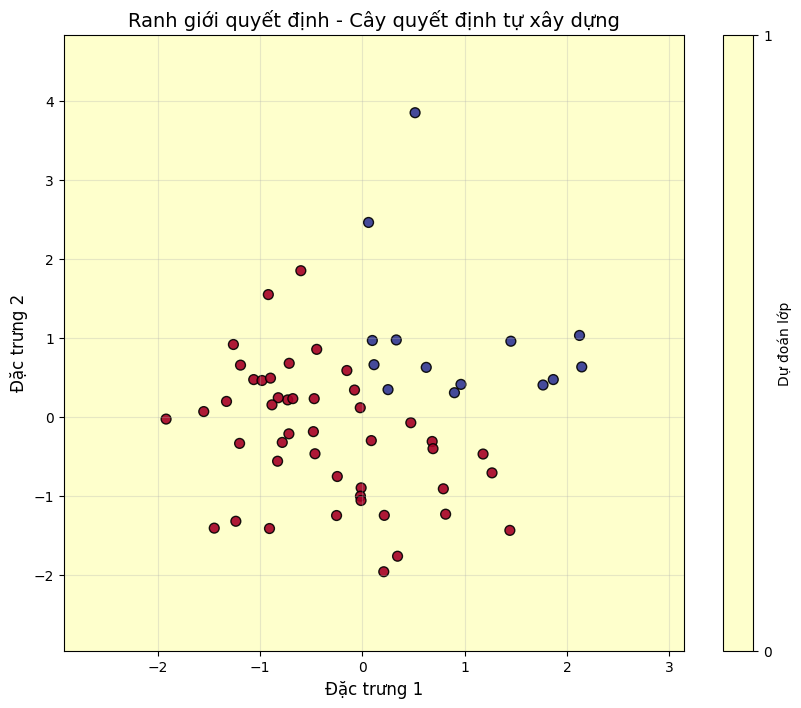


7. So sánh với sklearn...
   - Accuracy sklearn: 1.0000
   - Accuracy tự xây dựng: 1.0000


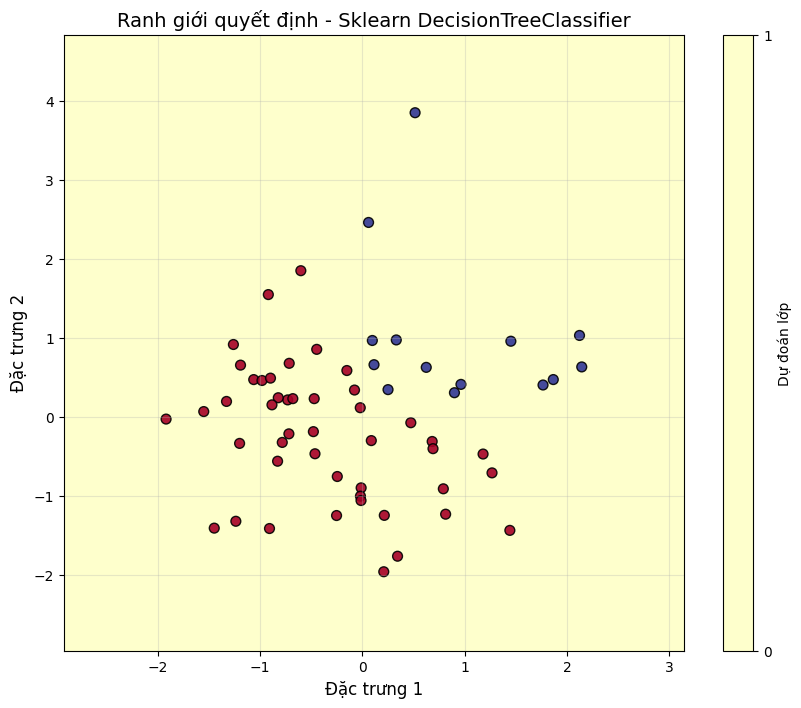

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

class CayQuyetDinhTuDau:
    """
    Cây quyết định được xây dựng từ đầu
    
    Cây quyết định hoạt động như một bác sĩ chẩn đoán:
    - Hỏi một loạt câu hỏi yes/no
    - Dựa trên câu trả lời để đưa ra quyết định cuối cùng
    - Mỗi nút trong cây là một câu hỏi
    - Mỗi lá là một quyết định/dự đoán
    """
    
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        """
        Khởi tạo cây quyết định với các tham số điều khiển
        
        Tham số:
        - max_depth: Độ sâu tối đa của cây (None = không giới hạn)
        - min_samples_split: Số mẫu tối thiểu để chia nút
        - min_samples_leaf: Số mẫu tối thiểu trong một lá
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None  # Cây sẽ được xây dựng sau khi training
    
    def _tinh_entropy(self, y):
        """
        Tính entropy (độ hỗn loạn) của tập dữ liệu
        
        Entropy = -Σ(p_i * log2(p_i))
        
        Trong đó:
        - p_i là xác suất của lớp i
        - Entropy = 0: tập dữ liệu hoàn toàn thuần khiết (chỉ 1 lớp)
        - Entropy cao: tập dữ liệu hỗn loạn (nhiều lớp trộn lẫn)
        
        Tham số:
        - y: mảng nhãn lớp
        
        Trả về:
        - Giá trị entropy (0 đến log2(số_lớp))
        """
        if len(y) == 0:
            return 0
        
        # Đếm số lượng mẫu của từng lớp
        unique_classes, counts = np.unique(y, return_counts=True)
        
        # Tính xác suất của từng lớp
        probabilities = counts / len(y)
        
        # Tính entropy theo công thức
        entropy = 0
        for p in probabilities:
            if p > 0:  # Tránh log(0) = -∞
                entropy -= p * np.log2(p)
        
        return entropy
    
    def _tinh_information_gain(self, X_column, y, threshold):
        """
        Tính information gain khi chia dữ liệu tại threshold
        
        Information Gain = Entropy(parent) - Weighted_Entropy(children)
        
        Tham số:
        - X_column: giá trị của một đặc trưng cụ thể
        - y: nhãn lớp
        - threshold: ngưỡng để chia (X <= threshold vs X > threshold)
        
        Trả về:
        - Information gain (càng cao càng tốt)
        """
        # Chia dữ liệu thành 2 nhóm dựa trên threshold
        left_mask = X_column <= threshold   # Nhóm trái: X <= threshold
        right_mask = ~left_mask            # Nhóm phải: X > threshold
        
        # Kiểm tra chia hợp lệ (cả 2 nhóm đều phải có ít nhất 1 mẫu)
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0
        
        # Tính entropy của nút cha (trước khi chia)
        parent_entropy = self._tinh_entropy(y)
        
        # Tính entropy của các nút con (sau khi chia)
        n = len(y)
        n_left, n_right = np.sum(left_mask), np.sum(right_mask)
        
        left_entropy = self._tinh_entropy(y[left_mask])
        right_entropy = self._tinh_entropy(y[right_mask])
        
        # Tính weighted entropy (trung bình có trọng số của entropy con)
        weighted_entropy = (n_left/n) * left_entropy + (n_right/n) * right_entropy
        
        # Information gain = entropy giảm được sau khi chia
        information_gain = parent_entropy - weighted_entropy
        return information_gain
    
    def _tim_chia_toi_uu(self, X, y):
        """
        Tìm cách chia tối ưu cho nút hiện tại
        
        Thử tất cả các đặc trưng và tất cả các threshold có thể
        để tìm ra cách chia cho information gain cao nhất
        
        Tham số:
        - X: ma trận đặc trưng
        - y: nhãn lớp
        
        Trả về:
        - best_feature: chỉ số đặc trưng tốt nhất
        - best_threshold: ngưỡng tốt nhất
        - best_gain: information gain cao nhất
        """
        best_gain = 0
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        # Thử từng đặc trưng
        for feature_idx in range(n_features):
            # Lấy giá trị của đặc trưng này
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)
            
            # Thử các threshold có thể (điểm giữa của các giá trị liền kề)
            for i in range(len(unique_values) - 1):
                # Threshold = trung bình của 2 giá trị liền kề
                threshold = (unique_values[i] + unique_values[i+1]) / 2
                
                # Tính information gain cho cách chia này
                gain = self._tinh_information_gain(feature_values, y, threshold)
                
                # Cập nhật nếu tìm được cách chia tốt hơn
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gain
    
    def _tao_nut(self, X, y, depth=0):
        """
        Tạo nút trong cây bằng thuật toán đệ quy
        
        Thuật toán:
        1. Kiểm tra điều kiện dừng
        2. Nếu dừng: tạo lá với nhãn phổ biến nhất
        3. Nếu tiếp tục: tìm cách chia tối ưu
        4. Chia dữ liệu và đệ quy tạo nút con
        
        Tham số:
        - X: ma trận đặc trưng
        - y: nhãn lớp
        - depth: độ sâu hiện tại
        
        Trả về:
        - Dictionary mô tả nút (lá hoặc nút phân nhánh)
        """
        n_samples, n_features = X.shape
        
        # ========== KIỂM TRA ĐIỀU KIỆN DỪNG ==========
        
        # Điều kiện 1: Đạt độ sâu tối đa
        # Điều kiện 2: Không đủ mẫu để chia
        # Điều kiện 3: Tất cả mẫu cùng lớp (entropy = 0)
        if (self.max_depth is not None and depth >= self.max_depth) or \
           (n_samples < self.min_samples_split) or \
           (len(np.unique(y)) == 1):
            # Tạo nút lá
            most_common_class = np.bincount(y).argmax()  # Lớp xuất hiện nhiều nhất
            return {
                'is_leaf': True,
                'prediction': most_common_class,
                'samples': n_samples,
                'entropy': self._tinh_entropy(y)
            }
        
        # ========== TÌM CÁCH CHIA TỐI ƯU ==========
        
        best_feature, best_threshold, best_gain = self._tim_chia_toi_uu(X, y)
        
        # Nếu không tìm được cách chia tốt (gain = 0)
        if best_gain == 0:
            most_common_class = np.bincount(y).argmax()
            return {
                'is_leaf': True,
                'prediction': most_common_class,
                'samples': n_samples,
                'entropy': self._tinh_entropy(y)
            }
        
        # ========== CHIA DỮ LIỆU ==========
        
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        # Kiểm tra ràng buộc về số mẫu tối thiểu trong lá
        if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
            most_common_class = np.bincount(y).argmax()
            return {
                'is_leaf': True,
                'prediction': most_common_class,
                'samples': n_samples,
                'entropy': self._tinh_entropy(y)
            }
        
        # ========== TẠO NÚT PHÂN NHÁNH ==========
        
        return {
            'is_leaf': False,
            'feature': best_feature,           # Đặc trưng được chọn để chia
            'threshold': best_threshold,       # Ngưỡng chia
            'samples': n_samples,              # Số mẫu tại nút này
            'entropy': self._tinh_entropy(y),  # Entropy của nút
            'information_gain': best_gain,     # Information gain đạt được
            # Đệ quy tạo nút con
            'left': self._tao_nut(X[left_mask], y[left_mask], depth + 1),
            'right': self._tao_nut(X[right_mask], y[right_mask], depth + 1)
        }
    
    def huan_luyen(self, X, y):
        """
        Huấn luyện cây quyết định
        
        Tham số:
        - X: ma trận đặc trưng training
        - y: nhãn lớp training
        """
        X = np.array(X)
        y = np.array(y)
        
        print(f"=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===")
        print(f"Dữ liệu: {X.shape[0]} mẫu, {X.shape[1]} đặc trưng")
        print(f"Các lớp: {np.unique(y)}")
        
        # Xây dựng cây từ nút gốc
        self.tree = self._tao_nut(X, y)
        
        # Thống kê cây sau khi xây dựng
        depth = self._tinh_do_sau(self.tree)
        n_leaves = self._dem_la(self.tree)
        
        print(f"Độ sâu cây: {depth}")
        print(f"Số lá: {n_leaves}")
        print(f"=== HOÀN THÀNH HUẤN LUYỆN ===")
    
    def _tinh_do_sau(self, node):
        """
        Tính độ sâu của cây (đệ quy)
        
        Tham số:
        - node: nút hiện tại
        
        Trả về:
        - Độ sâu từ nút này đến lá xa nhất
        """
        if node['is_leaf']:
            return 1
        return 1 + max(self._tinh_do_sau(node['left']), 
                      self._tinh_do_sau(node['right']))
    
    def _dem_la(self, node):
        """
        Đếm số lá trong cây (đệ quy)
        
        Tham số:
        - node: nút hiện tại
        
        Trả về:
        - Tổng số lá từ nút này trở xuống
        """
        if node['is_leaf']:
            return 1
        return self._dem_la(node['left']) + self._dem_la(node['right'])
    
    def _du_doan_mau(self, x, node):
        """
        Dự đoán cho một mẫu dữ liệu bằng cách duyệt cây
        
        Tham số:
        - x: vector đặc trưng của một mẫu
        - node: nút hiện tại trong quá trình duyệt
        
        Trả về:
        - Nhãn lớp dự đoán
        """
        # Nếu đến lá thì trả về dự đoán
        if node['is_leaf']:
            return node['prediction']
        
        # Nếu chưa đến lá, tiếp tục duyệt theo điều kiện
        if x[node['feature']] <= node['threshold']:
            # Điều kiện đúng → đi sang nhánh trái
            return self._du_doan_mau(x, node['left'])
        else:
            # Điều kiện sai → đi sang nhánh phải
            return self._du_doan_mau(x, node['right'])
    
    def du_doan(self, X):
        """
        Dự đoán cho nhiều mẫu dữ liệu
        
        Tham số:
        - X: ma trận đặc trưng cần dự đoán
        
        Trả về:
        - Mảng nhãn dự đoán
        """
        if self.tree is None:
            raise ValueError("Mô hình chưa được huấn luyện!")
        
        X = np.array(X)
        predictions = []
        
        # Dự đoán cho từng mẫu
        for x in X:
            pred = self._du_doan_mau(x, self.tree)
            predictions.append(pred)
        
        return np.array(predictions)
    
    def in_cay(self, node=None, depth=0, feature_names=None):
        """
        In cấu trúc cây theo dạng text để dễ hiểu
        
        Tham số:
        - node: nút hiện tại (None = bắt đầu từ gốc)
        - depth: độ sâu hiện tại (để tạo indentation)
        - feature_names: tên các đặc trưng (để hiển thị đẹp hơn)
        """
        if node is None:
            node = self.tree
        
        # Tạo indentation theo độ sâu
        indent = "  " * depth
        
        if node['is_leaf']:
            # Nút lá: hiển thị dự đoán và thống kê
            print(f"{indent}🍃 Dự đoán: Lớp {node['prediction']} "
                  f"(mẫu: {node['samples']}, entropy: {node['entropy']:.3f})")
        else:
            # Nút phân nhánh: hiển thị điều kiện chia
            feature_name = f"Đặc trưng {node['feature']}" if feature_names is None else feature_names[node['feature']]
            print(f"{indent}❓ {feature_name} <= {node['threshold']:.3f} "
                  f"(mẫu: {node['samples']}, gain: {node['information_gain']:.3f})")
            
            # Đệ quy in nhánh con
            print(f"{indent}├─ True (≤):")
            self.in_cay(node['left'], depth + 1, feature_names)
            print(f"{indent}└─ False (>):")
            self.in_cay(node['right'], depth + 1, feature_names)

def ve_ranh_gioi_cay(model, X, y, title="Ranh giới quyết định - Cây"):
    """
    Vẽ ranh giới quyết định cho cây quyết định
    
    Cây quyết định tạo ra ranh giới dạng "hình hộp" (axis-aligned)
    vì mỗi lần chia chỉ xét một đặc trưng với một threshold
    
    Tham số:
    - model: mô hình cây quyết định đã huấn luyện
    - X: dữ liệu đặc trưng (2D để vẽ được)
    - y: nhãn thật
    - title: tiêu đề biểu đồ
    """
    h = 0.02  # Độ phân giải mesh
    
    # Tạo lưới điểm để tính dự đoán
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Dự đoán cho từng điểm trong lưới
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Kiểm tra loại model và gọi phương thức dự đoán phù hợp
    if hasattr(model, 'du_doan'):
        Z = model.du_doan(mesh_points)  # For custom CayQuyetDinhTuDau
    else:
        Z = model.predict(mesh_points)  # For sklearn DecisionTreeClassifier
    Z = Z.reshape(xx.shape)
    
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu', levels=np.unique(Z))
    plt.colorbar(label='Dự đoán lớp')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                edgecolors='black', s=50, alpha=0.9)
    plt.xlabel('Đặc trưng 1', fontsize=12)
    plt.ylabel('Đặc trưng 2', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

def demo_cay_quyet_dinh():
    """
    Hàm demo hoàn chỉnh để test cây quyết định
    """
    print("=== DEMO CÂY QUYẾT ĐỊNH TỪ ĐẦU ===\n")
    
    # ========== TẠO DỮ LIỆU DEMO ==========
    print("1. Tạo dữ liệu demo...")
    np.random.seed(42)
    X_tree = np.random.randn(200, 2)
    y_tree = ((X_tree[:, 0] > 0) & (X_tree[:, 1] > 0)).astype(int)
    
    print(f"   - Dữ liệu: {X_tree.shape[0]} mẫu, {X_tree.shape[1]} đặc trưng")
    print(f"   - Phân phối lớp: {np.bincount(y_tree)}")
    
    # ========== CHIA DỮ LIỆU ==========
    print("2. Chia dữ liệu train/test...")
    X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
        X_tree, y_tree, test_size=0.3, random_state=42)
    
    print(f"   - Training: {X_train_tree.shape[0]} mẫu")
    print(f"   - Test: {X_test_tree.shape[0]} mẫu")
    
    # ========== HUẤN LUYỆN CÂY ==========
    print("3. Huấn luyện cây quyết định...")
    tree_model = CayQuyetDinhTuDau(
        max_depth=5,           # Giới hạn độ sâu để tránh overfitting
        min_samples_split=5,   # Cần ít nhất 5 mẫu để chia
        min_samples_leaf=2     # Mỗi lá phải có ít nhất 2 mẫu
    )
    tree_model.huan_luyen(X_train_tree, y_train_tree)
    
    # ========== HIỂN THỊ CẤU TRÚC CÂY ==========
    print("\n4. Cấu trúc cây học được:")
    tree_model.in_cay(feature_names=['X1 (ngang)', 'X2 (dọc)'])
    
    # ========== ĐÁNH GIÁ MÔ HÌNH ==========
    print("\n5. Đánh giá mô hình...")
    
    # Dự đoán trên tập test
    y_pred_tree = tree_model.du_doan(X_test_tree)
    accuracy_tree = np.mean(y_pred_tree == y_test_tree)
    
    print(f"   - Accuracy trên test: {accuracy_tree:.4f}")
    
    # Chi tiết hơn về performance
    from sklearn.metrics import classification_report
    print(f"\n   Báo cáo chi tiết:")
    print(f"   - True Positives: {np.sum((y_test_tree == 1) & (y_pred_tree == 1))}")
    print(f"   - True Negatives: {np.sum((y_test_tree == 0) & (y_pred_tree == 0))}")
    print(f"   - False Positives: {np.sum((y_test_tree == 0) & (y_pred_tree == 1))}")
    print(f"   - False Negatives: {np.sum((y_test_tree == 1) & (y_pred_tree == 0))}")
    
    # ========== VẼ RANH GIỚI QUYẾT ĐỊNH ==========
    print("\n6. Vẽ ranh giới quyết định...")
    ve_ranh_gioi_cay(tree_model, X_test_tree, y_test_tree, 
                     "Ranh giới quyết định - Cây quyết định tự xây dựng")
    
    # ========== SO SÁNH VỚI SKLEARN ==========
    print("\n7. So sánh với sklearn...")
    sklearn_tree = DecisionTreeClassifier(
        max_depth=5, 
        min_samples_split=5, 
        min_samples_leaf=2, 
        random_state=42
    )
    sklearn_tree.fit(X_train_tree, y_train_tree)
    sklearn_accuracy = sklearn_tree.score(X_test_tree, y_test_tree)
    
    print(f"   - Accuracy sklearn: {sklearn_accuracy:.4f}")
    print(f"   - Accuracy tự xây dựng: {accuracy_tree:.4f}")
    
    # Vẽ ranh giới của sklearn để so sánh
    ve_ranh_gioi_cay(sklearn_tree, X_test_tree, y_test_tree,
                     "Ranh giới quyết định - Sklearn DecisionTreeClassifier")
    
    return tree_model, sklearn_tree

# ========== CHẠY DEMO ==========
if __name__ == "__main__":
    # Chạy demo hoàn chỉnh
    my_tree, sklearn_tree = demo_cay_quyet_dinh()


=== KIỂM TRA CÂY QUYẾT ĐỊNH ===
=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===
Dữ liệu: 140 mẫu, 2 đặc trưng
Các lớp: [0 1]
Độ sâu cây: 3
Số lá: 3
=== HOÀN THÀNH HUẤN LUYỆN ===

Cấu trúc cây:
X2 <= -0.025 (mẫu: 140, gain: 0.346)
├─ True:
  Dự đoán: Lớp 0 (mẫu: 70, entropy: 0.000)
└─ False:
  X1 <= -0.011 (mẫu: 70, gain: 0.995)
  ├─ True:
    Dự đoán: Lớp 0 (mẫu: 32, entropy: 0.000)
  └─ False:
    Dự đoán: Lớp 1 (mẫu: 38, entropy: 0.000)

Accuracy: 1.0000


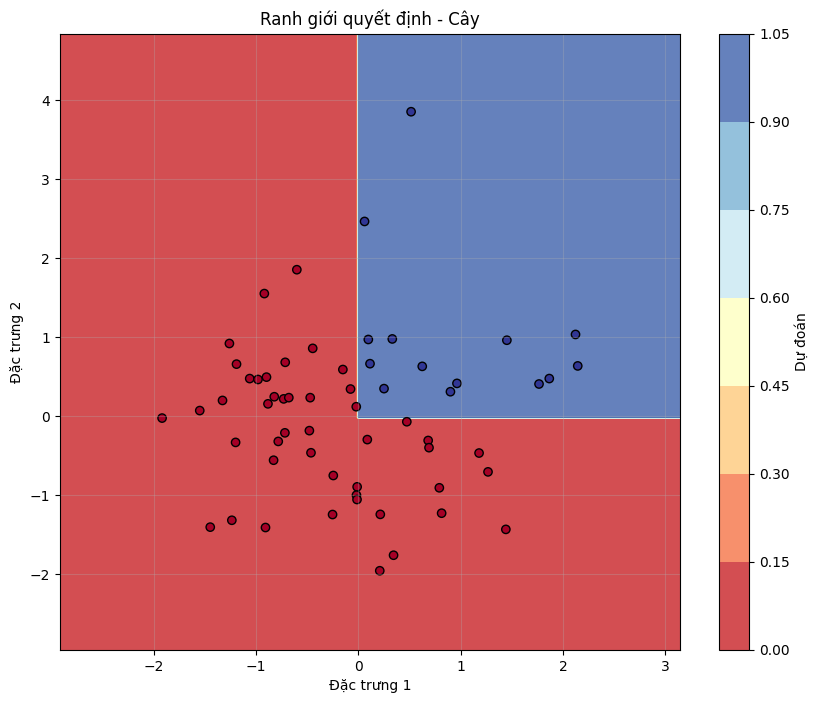

In [9]:

class CayQuyetDinhTuDau:
    """
    Cây quyết định được xây dựng từ đầu
    """
    
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None
    
    def _tinh_entropy(self, y):
        """
        Tính entropy của tập dữ liệu
        Entropy = -Σ(p_i * log2(p_i))
        """
        if len(y) == 0:
            return 0
        
        # Đếm số lượng từng lớp
        unique_classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        
        # Tính entropy
        entropy = 0
        for p in probabilities:
            if p > 0:  # Tránh log(0)
                entropy -= p * np.log2(p)
        
        return entropy
    
    def _tinh_information_gain(self, X_column, y, threshold):
        """
        Tính information gain khi chia tại threshold
        """
        # Chia dữ liệu
        left_mask = X_column <= threshold
        right_mask = ~left_mask
        
        # Kiểm tra chia hợp lệ
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0
        
        # Entropy ban đầu
        parent_entropy = self._tinh_entropy(y)
        
        # Entropy sau khi chia
        n = len(y)
        n_left, n_right = np.sum(left_mask), np.sum(right_mask)
        
        left_entropy = self._tinh_entropy(y[left_mask])
        right_entropy = self._tinh_entropy(y[right_mask])
        
        # Weighted entropy
        weighted_entropy = (n_left/n) * left_entropy + (n_right/n) * right_entropy
        
        # Information gain
        information_gain = parent_entropy - weighted_entropy
        return information_gain
    
    def _tim_chia_toi_uu(self, X, y):
        """
        Tìm cách chia tối ưu (đặc trưng và threshold)
        """
        best_gain = 0
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        for feature_idx in range(n_features):
            # Lấy các giá trị unique làm threshold candidates
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)
            
            # Thử các threshold
            for i in range(len(unique_values) - 1):
                threshold = (unique_values[i] + unique_values[i+1]) / 2
                gain = self._tinh_information_gain(feature_values, y, threshold)
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gain
    
    def _tao_nut(self, X, y, depth=0):
        """
        Tạo nút trong cây (đệ quy)
        """
        n_samples, n_features = X.shape
        
        # Điều kiện dừng
        if (self.max_depth is not None and depth >= self.max_depth) or \
           (n_samples < self.min_samples_split) or \
           (len(np.unique(y)) == 1):
            # Tạo lá
            most_common_class = np.bincount(y).argmax()
            return {
                'is_leaf': True,
                'prediction': most_common_class,
                'samples': n_samples,
                'entropy': self._tinh_entropy(y)
            }
        
        # Tìm cách chia tối ưu
        best_feature, best_threshold, best_gain = self._tim_chia_toi_uu(X, y)
        
        if best_gain == 0:
            # Không thể chia thêm
            most_common_class = np.bincount(y).argmax()
            return {
                'is_leaf': True,
                'prediction': most_common_class,
                'samples': n_samples,
                'entropy': self._tinh_entropy(y)
            }
        
        # Chia dữ liệu
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        # Kiểm tra số lượng mẫu tối thiểu
        if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
            most_common_class = np.bincount(y).argmax()
            return {
                'is_leaf': True,
                'prediction': most_common_class,
                'samples': n_samples,
                'entropy': self._tinh_entropy(y)
            }
        
        # Tạo nút phân nhánh
        return {
            'is_leaf': False,
            'feature': best_feature,
            'threshold': best_threshold,
            'samples': n_samples,
            'entropy': self._tinh_entropy(y),
            'information_gain': best_gain,
            'left': self._tao_nut(X[left_mask], y[left_mask], depth + 1),
            'right': self._tao_nut(X[right_mask], y[right_mask], depth + 1)
        }
    
    def huan_luyen(self, X, y):
        """
        Huấn luyện cây quyết định
        """
        X = np.array(X)
        y = np.array(y)
        
        print(f"=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===")
        print(f"Dữ liệu: {X.shape[0]} mẫu, {X.shape[1]} đặc trưng")
        print(f"Các lớp: {np.unique(y)}")
        
        self.tree = self._tao_nut(X, y)
        
        # Thống kê cây
        depth = self._tinh_do_sau(self.tree)
        n_leaves = self._dem_la(self.tree)
        
        print(f"Độ sâu cây: {depth}")
        print(f"Số lá: {n_leaves}")
        print(f"=== HOÀN THÀNH HUẤN LUYỆN ===")
    
    def _tinh_do_sau(self, node):
        """Tính độ sâu của cây"""
        if node['is_leaf']:
            return 1
        return 1 + max(self._tinh_do_sau(node['left']), self._tinh_do_sau(node['right']))
    
    def _dem_la(self, node):
        """Đếm số lá trong cây"""
        if node['is_leaf']:
            return 1
        return self._dem_la(node['left']) + self._dem_la(node['right'])
    
    def _du_doan_mau(self, x, node):
        """
        Dự đoán cho một mẫu dữ liệu
        """
        if node['is_leaf']:
            return node['prediction']
        
        if x[node['feature']] <= node['threshold']:
            return self._du_doan_mau(x, node['left'])
        else:
            return self._du_doan_mau(x, node['right'])
    
    def du_doan(self, X):
        """
        Dự đoán cho nhiều mẫu
        """
        if self.tree is None:
            raise ValueError("Mô hình chưa được huấn luyện!")
        
        X = np.array(X)
        predictions = []
        
        for x in X:
            pred = self._du_doan_mau(x, self.tree)
            predictions.append(pred)
        
        return np.array(predictions)
    
    def in_cay(self, node=None, depth=0, feature_names=None):
        """
        In cấu trúc cây
        """
        if node is None:
            node = self.tree
        
        indent = "  " * depth
        
        if node['is_leaf']:
            print(f"{indent}Dự đoán: Lớp {node['prediction']} (mẫu: {node['samples']}, entropy: {node['entropy']:.3f})")
        else:
            feature_name = f"Đặc trưng {node['feature']}" if feature_names is None else feature_names[node['feature']]
            print(f"{indent}{feature_name} <= {node['threshold']:.3f} (mẫu: {node['samples']}, gain: {node['information_gain']:.3f})")
            print(f"{indent}├─ True:")
            self.in_cay(node['left'], depth + 1, feature_names)
            print(f"{indent}└─ False:")
            self.in_cay(node['right'], depth + 1, feature_names)

# Test cây quyết định
print("\n=== KIỂM TRA CÂY QUYẾT ĐỊNH ===")

# Tạo dữ liệu dễ hiểu
np.random.seed(42)
X_tree = np.random.randn(200, 2)
y_tree = ((X_tree[:, 0] > 0) & (X_tree[:, 1] > 0)).astype(int)

# Chia dữ liệu
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42)

# Huấn luyện cây
tree_model = CayQuyetDinhTuDau(max_depth=5, min_samples_split=5, min_samples_leaf=2)
tree_model.huan_luyen(X_train_tree, y_train_tree)

# In cấu trúc cây
print(f"\nCấu trúc cây:")
tree_model.in_cay(feature_names=['X1', 'X2'])

# Dự đoán và đánh giá
y_pred_tree = tree_model.du_doan(X_test_tree)
accuracy_tree = np.mean(y_pred_tree == y_test_tree)
print(f"\nAccuracy: {accuracy_tree:.4f}")

# Vẽ ranh giới quyết định
def ve_ranh_gioi_cay(model, X, y, title="Ranh giới quyết định - Cây"):
    """
    Vẽ ranh giới quyết định cho cây quyết định
    """
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.du_doan(mesh_points)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')
    plt.colorbar(label='Dự đoán')
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
    plt.xlabel('Đặc trưng 1')
    plt.ylabel('Đặc trưng 2')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()

ve_ranh_gioi_cay(tree_model, X_test_tree, y_test_tree)

In [10]:
class RungNgauNhienTuDau:
    """
    Rừng ngẫu nhiên được xây dựng từ đầu
    """
    
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, 
                 min_samples_leaf=1, max_features='sqrt', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        
        self.trees = []
        self.feature_indices = []
    
    def _bootstrap_sample(self, X, y, rng):
        """
        Tạo bootstrap sample (sampling with replacement)
        """
        n_samples = X.shape[0]
        indices = rng.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]
    
    def _select_features(self, n_features, rng):
        """
        Chọn ngẫu nhiên subset của features
        """
        if self.max_features == 'sqrt':
            max_features = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            max_features = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            max_features = self.max_features
        else:
            max_features = n_features
        
        max_features = min(max_features, n_features)
        return rng.choice(n_features, size=max_features, replace=False)
    
    def huan_luyen(self, X, y):
        """
        Huấn luyện rừng ngẫu nhiên
        """
        X = np.array(X)
        y = np.array(y)
        
        print(f"=== HUẤN LUYỆN RỪNG NGẪU NHIÊN ===")
        print(f"Dữ liệu: {X.shape[0]} mẫu, {X.shape[1]} đặc trưng")
        print(f"Số cây: {self.n_estimators}")
        
        # Khởi tạo random number generator
        rng = np.random.RandomState(self.random_state)
        
        self.trees = []
        self.feature_indices = []
        
        for i in range(self.n_estimators):
            if (i + 1) % max(1, self.n_estimators // 5) == 0:
                print(f"Đang huấn luyện cây {i+1}/{self.n_estimators}")
            
            # Bootstrap sampling
            X_bootstrap, y_bootstrap = self._bootstrap_sample(X, y, rng)
            
            # Feature selection
            feature_indices = self._select_features(X.shape[1], rng)
            X_selected = X_bootstrap[:, feature_indices]
            
            # Tạo và huấn luyện cây
            tree = CayQuyetDinhTuDau(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.huan_luyen(X_selected, y_bootstrap)
            
            self.trees.append(tree)
            self.feature_indices.append(feature_indices)
        
        print(f"=== HOÀN THÀNH HUẤN LUYỆN ===")
    
    def du_doan(self, X):
        """
        Dự đoán bằng voting của tất cả các cây
        """
        if not self.trees:
            raise ValueError("Mô hình chưa được huấn luyện!")
        
        X = np.array(X)
        all_predictions = []
        
        # Dự đoán từ từng cây
        for tree, feature_indices in zip(self.trees, self.feature_indices):
            X_selected = X[:, feature_indices]
            predictions = tree.du_doan(X_selected)
            all_predictions.append(predictions)
        
        # Voting (majority rule)
        all_predictions = np.array(all_predictions)
        final_predictions = []
        
        for i in range(X.shape[0]):
            votes = all_predictions[:, i]
            # Lấy class có số vote nhiều nhất
            unique_votes, counts = np.unique(votes, return_counts=True)
            majority_class = unique_votes[np.argmax(counts)]
            final_predictions.append(majority_class)
        
        return np.array(final_predictions)
    
    def du_doan_xac_suat(self, X):
        """
        Dự đoán xác suất (tỷ lệ vote)
        """
        if not self.trees:
            raise ValueError("Mô hình chưa được huấn luyện!")
        
        X = np.array(X)
        all_predictions = []
        
        for tree, feature_indices in zip(self.trees, self.feature_indices):
            X_selected = X[:, feature_indices]
            predictions = tree.du_doan(X_selected)
            all_predictions.append(predictions)
        
        all_predictions = np.array(all_predictions)
        probabilities = []
        
        for i in range(X.shape[0]):
            votes = all_predictions[:, i]
            # Tính tỷ lệ vote cho class 1
            prob_class_1 = np.mean(votes == 1)
            probabilities.append(prob_class_1)
        
        return np.array(probabilities)

# Test rừng ngẫu nhiên
print("\n=== KIỂM TRA RỪNG NGẪU NHIÊN ===")

# Tạo dữ liệu phức tạp hơn
X_rf, y_rf = make_classification(n_samples=500, n_features=4, n_informative=3, 
                                n_redundant=1, n_clusters_per_class=2, random_state=42)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.3, random_state=42)

# Huấn luyện rừng ngẫu nhiên
rf_model = RungNgauNhienTuDau(n_estimators=50, max_depth=10, random_state=42)
rf_model.huan_luyen(X_train_rf, y_train_rf)

# Dự đoán và đánh giá
y_pred_rf = rf_model.du_doan(X_test_rf)
y_prob_rf = rf_model.du_doan_xac_suat(X_test_rf)

accuracy_rf = np.mean(y_pred_rf == y_test_rf)
print(f"\nAccuracy Rừng ngẫu nhiên: {accuracy_rf:.4f}")

# So sánh với cây đơn lẻ
single_tree = CayQuyetDinhTuDau(max_depth=10)
single_tree.huan_luyen(X_train_rf, y_train_rf)
y_pred_single = single_tree.du_doan(X_test_rf)
accuracy_single = np.mean(y_pred_single == y_test_rf)

print(f"Accuracy Cây đơn lẻ: {accuracy_single:.4f}")
print(f"Cải thiện: {accuracy_rf - accuracy_single:.4f}")


=== KIỂM TRA RỪNG NGẪU NHIÊN ===
=== HUẤN LUYỆN RỪNG NGẪU NHIÊN ===
Dữ liệu: 350 mẫu, 4 đặc trưng
Số cây: 50
=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===
Dữ liệu: 350 mẫu, 2 đặc trưng
Các lớp: [0 1]
Độ sâu cây: 11
Số lá: 42
=== HOÀN THÀNH HUẤN LUYỆN ===
=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===
Dữ liệu: 350 mẫu, 2 đặc trưng
Các lớp: [0 1]
Độ sâu cây: 11
Số lá: 37
=== HOÀN THÀNH HUẤN LUYỆN ===
=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===
Dữ liệu: 350 mẫu, 2 đặc trưng
Các lớp: [0 1]
Độ sâu cây: 11
Số lá: 27
=== HOÀN THÀNH HUẤN LUYỆN ===
=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===
Dữ liệu: 350 mẫu, 2 đặc trưng
Các lớp: [0 1]
Độ sâu cây: 11
Số lá: 26
=== HOÀN THÀNH HUẤN LUYỆN ===
=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===
Dữ liệu: 350 mẫu, 2 đặc trưng
Các lớp: [0 1]
Độ sâu cây: 11
Số lá: 25
=== HOÀN THÀNH HUẤN LUYỆN ===
=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===
Dữ liệu: 350 mẫu, 2 đặc trưng
Các lớp: [0 1]
Độ sâu cây: 11
Số lá: 27
=== HOÀN THÀNH HUẤN LUYỆN ===
=== HUẤN LUYỆN CÂY QUYẾT ĐỊNH ===
Dữ liệu: 350 mẫu, 2 đặc trưng
Các lớp: [0 1]
Độ sâu 


=== KIỂM TRA SVM ===
=== HUẤN LUYỆN SVM ===
Dữ liệu: 140 mẫu, 2 đặc trưng
Learning rate: 0.001
Lambda: 0.01

Vòng lặp | Cost     | Accuracy
-----------------------------------
       0 | 1.013220 |    0.136
     100 | 0.945065 |    0.921
     200 | 0.877046 |    0.921
     300 | 0.809164 |    0.921
     400 | 0.741419 |    0.921
     500 | 0.673810 |    0.914
     600 | 0.609203 |    0.921
     700 | 0.552076 |    0.921
     800 | 0.501069 |    0.921
     900 | 0.462371 |    0.921

=== HOÀN THÀNH HUẤN LUYỆN ===
Cost cuối cùng: 0.433608

Accuracy SVM: 0.9500


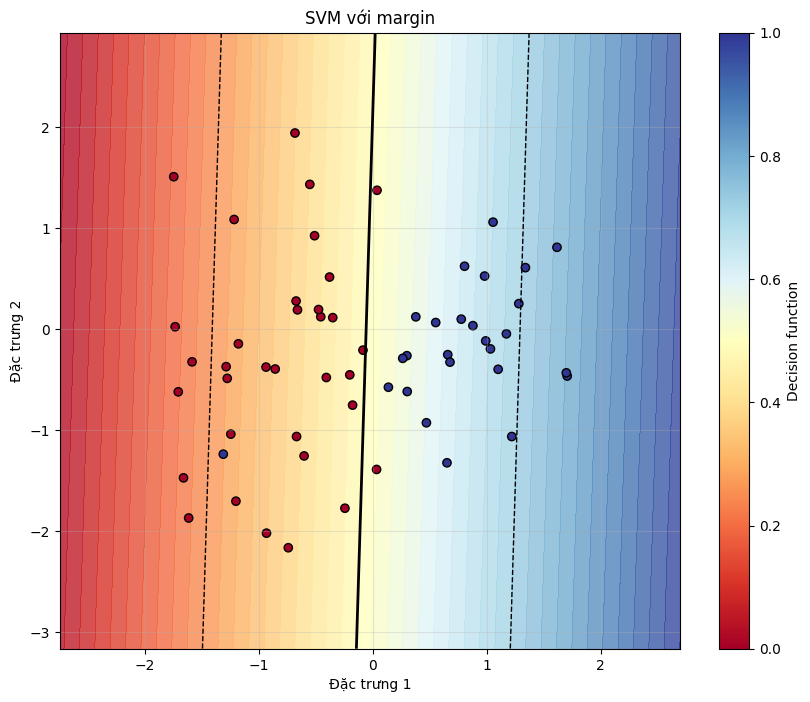

In [11]:
class SVMTuDau:
    """
    SVM tuyến tính đơn giản được xây dựng từ đầu
    """
    
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param  # Tham số regularization
        self.n_iterations = n_iterations
        
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def _khoi_tao_tham_so(self, n_features):
        """
        Khởi tạo trọng số và bias
        """
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
    
    def _tinh_cost(self, X, y):
        """
        Tính hàm mất mát SVM (Hinge Loss + Regularization)
        """
        n_samples = X.shape[0]
        
        # Tính distance từ các điểm đến hyperplane
        distances = y * (X @ self.weights + self.bias)
        
        # Hinge loss: max(0, 1 - distance)
        hinge_loss = np.maximum(0, 1 - distances)
        
        # Tổng cost = regularization + hinge loss
        regularization = self.lambda_param * np.sum(self.weights ** 2)
        total_cost = regularization + np.mean(hinge_loss)
        
        return total_cost
    
    def _tinh_gradient(self, X, y):
        """
        Tính gradient cho SVM
        """
        n_samples = X.shape[0]
        
        # Tính distance
        distances = y * (X @ self.weights + self.bias)
        
        # Gradient cho regularization term
        dw = 2 * self.lambda_param * self.weights
        db = 0
        
        # Gradient cho hinge loss
        for i in range(n_samples):
            if distances[i] < 1:  # Vi phạm margin
                dw -= y[i] * X[i]
                db -= y[i]
        
        dw /= n_samples
        db /= n_samples
        
        return dw, db
    
    def huan_luyen(self, X, y, verbose=True):
        """
        Huấn luyện SVM sử dụng gradient descent
        """
        X = np.array(X)
        y = np.array(y)
        
        # Chuyển đổi nhãn từ {0,1} thành {-1,1}
        y = np.where(y <= 0, -1, 1)
        
        n_samples, n_features = X.shape
        self._khoi_tao_tham_so(n_features)
        
        if verbose:
            print(f"=== HUẤN LUYỆN SVM ===")
            print(f"Dữ liệu: {n_samples} mẫu, {n_features} đặc trưng")
            print(f"Learning rate: {self.learning_rate}")
            print(f"Lambda: {self.lambda_param}")
            print()
            print("Vòng lặp | Cost     | Accuracy")
            print("-" * 35)
        
        for iteration in range(self.n_iterations):
            # Tính cost
            cost = self._tinh_cost(X, y)
            self.cost_history.append(cost)
            
            # Tính gradient
            dw, db = self._tinh_gradient(X, y)
            
            # Cập nhật tham số
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Tính accuracy để theo dõi
            if iteration % 100 == 0 and verbose:
                predictions = self.du_doan(X)
                accuracy = np.mean(predictions == (y > 0).astype(int))
                print(f"{iteration:8d} | {cost:8.6f} | {accuracy:8.3f}")
        
        if verbose:
            print(f"\n=== HOÀN THÀNH HUẤN LUYỆN ===")
            print(f"Cost cuối cùng: {self.cost_history[-1]:.6f}")
    
    def du_doan(self, X):
        """
        Dự đoán nhãn lớp
        """
        if self.weights is None:
            raise ValueError("Mô hình chưa được huấn luyện!")
        
        X = np.array(X)
        linear_output = X @ self.weights + self.bias
        predictions = (linear_output >= 0).astype(int)
        return predictions
    
    def quyet_dinh_function(self, X):
        """
        Tính giá trị của decision function
        """
        if self.weights is None:
            raise ValueError("Mô hình chưa được huấn luyện!")
        
        X = np.array(X)
        return X @ self.weights + self.bias

# Test SVM
print("\n=== KIỂM TRA SVM ===")

# Tạo dữ liệu tuyến tính phân tách được
X_svm, y_svm = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                                  n_informative=2, n_clusters_per_class=1, 
                                  class_sep=1.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler_svm = StandardScaler()
X_svm_scaled = scaler_svm.fit_transform(X_svm)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm_scaled, y_svm, test_size=0.3, random_state=42)

# Huấn luyện SVM
svm_model = SVMTuDau(learning_rate=0.001, lambda_param=0.01, n_iterations=1000)
svm_model.huan_luyen(X_train_svm, y_train_svm)

# Đánh giá
y_pred_svm = svm_model.du_doan(X_test_svm)
accuracy_svm = np.mean(y_pred_svm == y_test_svm)
print(f"\nAccuracy SVM: {accuracy_svm:.4f}")

# Vẽ ranh giới quyết định với margin
def ve_svm_voi_margin(model, X, y, title="SVM với margin"):
    """
    Vẽ SVM với margin lines
    """
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.quyet_dinh_function(mesh_points)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    
    # Vẽ decision function
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    
    # Vẽ decision boundary (Z = 0)
    plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='-')
    
    # Vẽ margin boundaries (Z = ±1)
    plt.contour(xx, yy, Z, levels=[-1, 1], colors='black', linewidths=1, linestyles='--')
    
    # Vẽ dữ liệu
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
    
    plt.xlabel('Đặc trưng 1')
    plt.ylabel('Đặc trưng 2')
    plt.title(title)
    plt.colorbar(label='Decision function')
    plt.grid(True, alpha=0.3)
    plt.show()

ve_svm_voi_margin(svm_model, X_test_svm, y_test_svm)

=== BÀI THỰC HÀNH: PHÂN LOẠI EMAIL SPAM ===
Tổng số email: 2000
Số email spam: 917 (45.9%)
Số email bình thường: 1083 (54.1%)

Thống kê các đặc trưng:
       so_tu_viet_hoa  so_dau_cham_than     ti_le_so  co_tu_mien_phi  \
count     2000.000000        2000.00000  2000.000000     2000.000000   
mean         4.950500           2.03200     0.200085        0.275500   
std          2.183903           1.43771     0.119657        0.446878   
min          0.000000           0.00000     0.003176        0.000000   
25%          3.000000           1.00000     0.108807        0.000000   
50%          5.000000           2.00000     0.180013        0.000000   
75%          6.000000           3.00000     0.269716        1.000000   
max         14.000000           8.00000     0.675672        1.000000   

       co_tu_khan_cap  do_dai_email      so_link  co_attachment         spam  
count     2000.000000   2000.000000  2000.000000    2000.000000  2000.000000  
mean         0.199500    247.193734     2.

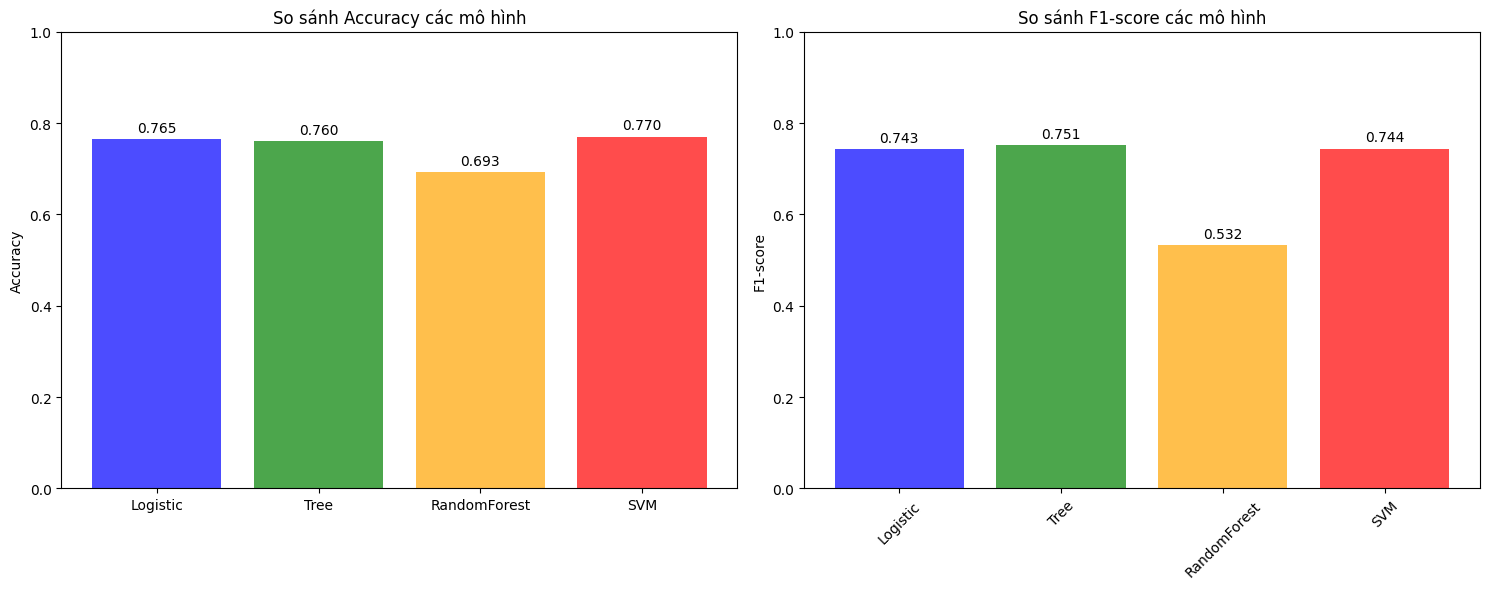

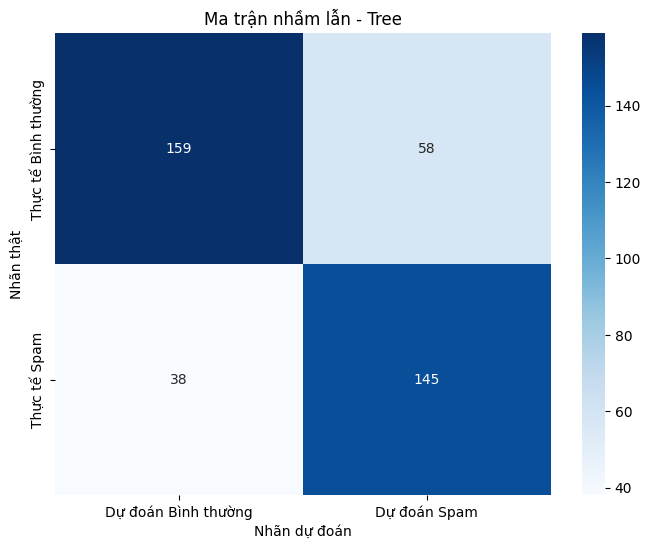


Mô hình tốt nhất: Tree
F1-score: 0.7513


In [12]:
def bai_thuc_hanh_phan_loai_email_spam():
    """
    Bài thực hành phân loại email spam
    """
    print("=== BÀI THỰC HÀNH: PHÂN LOẠI EMAIL SPAM ===")
    
    # Tạo dữ liệu mô phỏng email
    np.random.seed(42)
    n_emails = 2000
    
    # Các đặc trưng của email
    features = {
        'so_tu_viet_hoa': np.random.poisson(5, n_emails),  # Số từ viết hoa
        'so_dau_cham_than': np.random.poisson(2, n_emails),  # Số dấu !
        'ti_le_so': np.random.beta(2, 8, n_emails),  # Tỷ lệ ký tự số
        'co_tu_mien_phi': np.random.binomial(1, 0.3, n_emails),  # Có từ "miễn phí"
        'co_tu_khan_cap': np.random.binomial(1, 0.2, n_emails),  # Có từ "khẩn cấp"
        'do_dai_email': np.random.lognormal(5, 1, n_emails),  # Độ dài email
        'so_link': np.random.poisson(3, n_emails),  # Số link
        'co_attachment': np.random.binomial(1, 0.4, n_emails),  # Có file đính kèm
    }
    
    # Tạo DataFrame
    df_email = pd.DataFrame(features)
    
    # Tạo nhãn spam dựa trên logic thực tế
    spam_prob = (
        0.1 +  # Xác suất cơ bản
        0.3 * (df_email['so_tu_viet_hoa'] > 10) +  # Nhiều chữ hoa
        0.4 * (df_email['so_dau_cham_than'] > 3) +  # Nhiều dấu !
        0.5 * df_email['co_tu_mien_phi'] +  # Có "miễn phí"
        0.6 * df_email['co_tu_khan_cap'] +  # Có "khẩn cấp"
        0.2 * (df_email['so_link'] > 5) +  # Nhiều link
        0.1 * (df_email['ti_le_so'] > 0.2)  # Nhiều số
    )
    
    spam_prob = np.clip(spam_prob, 0, 1)
    df_email['spam'] = np.random.binomial(1, spam_prob, n_emails)
    
    print(f"Tổng số email: {len(df_email)}")
    print(f"Số email spam: {df_email['spam'].sum()} ({df_email['spam'].mean()*100:.1f}%)")
    print(f"Số email bình thường: {(1-df_email['spam']).sum()} ({(1-df_email['spam']).mean()*100:.1f}%)")
    
    # Thống kê mô tả
    print(f"\nThống kê các đặc trưng:")
    print(df_email.describe())
    
    # Chuẩn bị dữ liệu
    X = df_email.drop('spam', axis=1).values
    y = df_email['spam'].values
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Chia train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y)
    
    print(f"\nDữ liệu huấn luyện: {X_train.shape}")
    print(f"Dữ liệu kiểm tra: {X_test.shape}")
    
    # Huấn luyện các mô hình
    models = {}
    
    print(f"\n=== HUẤN LUYỆN CÁC MÔ HÌNH ===")
    
    # 1. Hồi quy Logistic
    print(f"\n1. Hồi quy Logistic:")
    logistic = HoiQuyLogisticTuDau(learning_rate=0.1, max_iterations=1000)
    logistic.huan_luyen(X_train, y_train, verbose=False)
    models['Logistic'] = logistic
    
    # 2. Cây quyết định
    print(f"\n2. Cây quyết định:")
    tree = CayQuyetDinhTuDau(max_depth=10, min_samples_split=10, min_samples_leaf=5)
    tree.huan_luyen(X_train, y_train)
    models['Tree'] = tree
    
    # 3. Rừng ngẫu nhiên
    print(f"\n3. Rừng ngẫu nhiên:")
    rf = RungNgauNhienTuDau(n_estimators=30, max_depth=8, random_state=42)
    rf.huan_luyen(X_train, y_train)
    models['RandomForest'] = rf
    
    # 4. SVM
    print(f"\n4. SVM:")
    svm = SVMTuDau(learning_rate=0.01, lambda_param=0.01, n_iterations=500)
    svm.huan_luyen(X_train, y_train, verbose=False)
    models['SVM'] = svm
    
    # Đánh giá tất cả mô hình
    print(f"\n=== ĐÁNH GIÁ CÁC MÔ HÌNH ===")
    results = {}
    
    for name, model in models.items():
        y_pred = model.du_doan(X_test)
        accuracy = np.mean(y_pred == y_test)
        
        # Tính precision, recall, F1
        tp = np.sum((y_test == 1) & (y_pred == 1))
        fp = np.sum((y_test == 0) & (y_pred == 1))
        fn = np.sum((y_test == 1) & (y_pred == 0))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        }
        
        print(f"\n{name}:")
        for metric, value in results[name].items():
            print(f"  {metric}: {value:.4f}")
    
    # So sánh với sklearn
    print(f"\n=== SO SÁNH VỚI SKLEARN ===")
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    
    sklearn_models = {
        'Sklearn Logistic': LogisticRegression(random_state=42, max_iter=1000),
        'Sklearn Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=10, 
                                              min_samples_leaf=5, random_state=42),
        'Sklearn RF': RandomForestClassifier(n_estimators=30, max_depth=8, random_state=42),
        'Sklearn SVM': SVC(kernel='linear', random_state=42)
    }
    
    for name, model in sklearn_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name}: {accuracy:.4f}")
    
    # Vẽ biểu đồ so sánh
    model_names = list(results.keys())
    accuracies = [results[name]['Accuracy'] for name in model_names]
    f1_scores = [results[name]['F1-score'] for name in model_names]
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Biểu đồ accuracy
    bars1 = axes[0].bar(model_names, accuracies, alpha=0.7, color=['blue', 'green', 'orange', 'red'])
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('So sánh Accuracy các mô hình')
    axes[0].set_ylim(0, 1)
    
    # Thêm giá trị lên các cột
    for bar, acc in zip(bars1, accuracies):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{acc:.3f}', ha='center', va='bottom')
    
    # Biểu đồ F1-score
    bars2 = axes[1].bar(model_names, f1_scores, alpha=0.7, color=['blue', 'green', 'orange', 'red'])
    axes[1].set_ylabel('F1-score')
    axes[1].set_title('So sánh F1-score các mô hình')
    axes[1].set_ylim(0, 1)
    
    for bar, f1 in zip(bars2, f1_scores):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{f1:.3f}', ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Ma trận nhầm lẫn cho mô hình tốt nhất
    best_model_name = max(results.keys(), key=lambda x: results[x]['F1-score'])
    best_model = models[best_model_name]
    y_pred_best = best_model.du_doan(X_test)
    
    # Tính confusion matrix
    tn = np.sum((y_test == 0) & (y_pred_best == 0))
    fp = np.sum((y_test == 0) & (y_pred_best == 1))
    fn = np.sum((y_test == 1) & (y_pred_best == 0))
    tp = np.sum((y_test == 1) & (y_pred_best == 1))
    
    cm = np.array([[tn, fp], [fn, tp]])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Dự đoán Bình thường', 'Dự đoán Spam'],
                yticklabels=['Thực tế Bình thường', 'Thực tế Spam'])
    plt.title(f'Ma trận nhầm lẫn - {best_model_name}')
    plt.ylabel('Nhãn thật')
    plt.xlabel('Nhãn dự đoán')
    plt.show()
    
    print(f"\nMô hình tốt nhất: {best_model_name}")
    print(f"F1-score: {results[best_model_name]['F1-score']:.4f}")
    
    return df_email, models, results

# Chạy bài thực hành
df_email, models, results = bai_thuc_hanh_phan_loai_email_spam()

In [15]:

class VotingClassifierTuDau:
    """
    Voting Classifier kết hợp nhiều thuật toán
    """
    
    def __init__(self, estimators, voting='hard'):
        self.estimators = estimators  # List of (name, model) tuples
        self.voting = voting  # 'hard' or 'soft'
        self.fitted_estimators = []
    
    def huan_luyen(self, X, y):
        """
        Huấn luyện tất cả các mô hình
        """
        print(f"=== VOTING CLASSIFIER ===")
        print(f"Huấn luyện {len(self.estimators)} mô hình...")
        
        self.fitted_estimators = []
        
        for name, model in self.estimators:
            print(f"Đang huấn luyện {name}...")
            model.huan_luyen(X, y)
            self.fitted_estimators.append((name, model))
        
        print("Hoàn thành huấn luyện tất cả mô hình!")
    
    def du_doan(self, X):
        """
        Dự đoán bằng voting
        """
        all_predictions = []
        
        for name, model in self.fitted_estimators:
            pred = model.du_doan(X)
            all_predictions.append(pred)
        
        all_predictions = np.array(all_predictions)
        
        if self.voting == 'hard':
            # Majority voting
            final_predictions = []
            for i in range(X.shape[0]):
                votes = all_predictions[:, i]
                unique_votes, counts = np.unique(votes, return_counts=True)
                majority_class = unique_votes[np.argmax(counts)]
                final_predictions.append(majority_class)
            return np.array(final_predictions)
        
        else:  # soft voting
            # Average probabilities (cần implement cho tất cả models)
            # Simplified: return hard voting for now
            return self.du_doan_hard(X)

# Demo Voting Classifier
print("\n=== VOTING CLASSIFIER DEMO ===")

# Sử dụng dữ liệu từ bài thực hành email
X = df_email.drop('spam', axis=1).values[:500]  # Subset nhỏ để demo
y = df_email['spam'].values[:500]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Tạo ensemble
estimators = [
    ('logistic', HoiQuyLogisticTuDau(learning_rate=0.1, max_iterations=500)),
    ('tree', CayQuyetDinhTuDau(max_depth=8)),
    ('svm', SVMTuDau(learning_rate=0.01, n_iterations=300))
]

voting_clf = VotingClassifierTuDau(estimators, voting='hard')
voting_clf.huan_luyen(X_train, y_train)

# Đánh giá
y_pred_voting = voting_clf.du_doan(X_test)
accuracy_voting = np.mean(y_pred_voting == y_test)

print(f"Accuracy Voting Classifier: {accuracy_voting:.4f}")

# So sánh với từng mô hình riêng lẻ
for name, model in voting_clf.fitted_estimators:
    y_pred_single = model.du_doan(X_test)
    accuracy_single = np.mean(y_pred_single == y_test)
    print(f"Accuracy {name}: {accuracy_single:.4f}")

class CrossValidationTuDau:
    """
    K-Fold Cross Validation từ đầu
    """
    
    def __init__(self, k=5, random_state=None):
        self.k = k
        self.random_state = random_state
    
    def chia_fold(self, X, y):
        """
        Chia dữ liệu thành k folds
        """
        n_samples = len(X)
        indices = np.arange(n_samples)


=== VOTING CLASSIFIER DEMO ===
=== VOTING CLASSIFIER ===
Huấn luyện 3 mô hình...
Đang huấn luyện logistic...
=== BẮT ĐẦU HUẤN LUYỆN HỒI QUY LOGISTIC ===
Dữ liệu: 350 mẫu, 8 đặc trưng
Learning rate: 0.1

Vòng lặp | Cost     | Accuracy | Thay đổi Cost
--------------------------------------------------
       0 | 0.692067 |    0.543 | +0.000000
       1 | 0.682304 |    0.731 | +0.009763
       2 | 0.673043 |    0.769 | +0.009260
       3 | 0.664258 |    0.783 | +0.008785
       4 | 0.655922 |    0.791 | +0.008336
       5 | 0.648010 |    0.794 | +0.007913
       6 | 0.640497 |    0.789 | +0.007513
       7 | 0.633361 |    0.789 | +0.007136
       8 | 0.626580 |    0.789 | +0.006781
       9 | 0.620133 |    0.789 | +0.006446
     100 | 0.472009 |    0.791 | +0.000289
     200 | 0.460366 |    0.789 | +0.000038
     300 | 0.458534 |    0.789 | +0.000007
     400 | 0.458150 |    0.789 | +0.000002
Hội tụ tại vòng lặp 438

=== HOÀN THÀNH HUẤN LUYỆN ===
Bias: -0.149719
Trọng số 1: -0.132436
Trọ